<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/mybranch/src/Unsupervised_2_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd

file_path = '/content/drive/MyDrive/dm_fire_prediction/merge/merged_v4_no_duplicates_0_undersampled_23_77.csv'
df = pd.read_csv(file_path)

# check first rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lcccode_label    55219 non-null  float64
 1   elevation        55219 non-null  float64
 2   COARSE           55219 non-null  float64
 3   SAND             55219 non-null  float64
 4   SILT             55219 non-null  float64
 5   CLAY             55219 non-null  float64
 6   BULK             55219 non-null  float64
 7   REF_BULK         55219 non-null  float64
 8   ORG_CARBON       55219 non-null  float64
 9   PH_WATER         55219 non-null  float64
 10  TOTAL_N          55219 non-null  float64
 11  CN_RATIO         55219 non-null  float64
 12  CEC_SOIL         55219 non-null  float64
 13  CEC_CLAY         55219 non-null  float64
 14  CEC_EFF          55219 non-null  float64
 15  TEB              55219 non-null  float64
 16  BSAT             55219 non-null  float64
 17  ALUM_SAT    

In [ ]:
X=df.drop(columns=['fire'])
y=df['fire']

## Feature Engineering

### Feature Selection

#### Recursive Feature Elimination

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

selected = X.columns[importances.argsort()[::-1][:25]]
print(selected)

Index(['elevation', 'prec_spring', 'prec_autumn', 'prec_winter', 'tmin_summer',
       'lcccode_label', 'prec_summer', 'tmin_autumn', 'CEC_CLAY',
       'tmax_summer', 'tmin_spring', 'tmax_autumn', 'tmax_winter',
       'tmax_spring', 'tmin_winter', 'PH_WATER', 'SAND', 'CEC_EFF', 'SILT',
       'TCARBON_EQ', 'CLAY', 'ELEC_COND', 'BULK', 'GYPSUM', 'ORG_CARBON'],
      dtype='object')


In [ ]:
X = X[selected]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      55219 non-null  float64
 1   prec_spring    55219 non-null  int64  
 2   prec_autumn    55219 non-null  int64  
 3   prec_winter    55219 non-null  int64  
 4   tmin_summer    55219 non-null  int64  
 5   lcccode_label  55219 non-null  float64
 6   prec_summer    55219 non-null  int64  
 7   tmin_autumn    55219 non-null  int64  
 8   CEC_CLAY       55219 non-null  float64
 9   tmax_summer    55219 non-null  int64  
 10  tmin_spring    55219 non-null  int64  
 11  tmax_autumn    55219 non-null  int64  
 12  tmax_winter    55219 non-null  int64  
 13  tmax_spring    55219 non-null  int64  
 14  tmin_winter    55219 non-null  int64  
 15  PH_WATER       55219 non-null  float64
 16  SAND           55219 non-null  float64
 17  CEC_EFF        55219 non-null  float64
 18  SILT  

### Feature Scaling

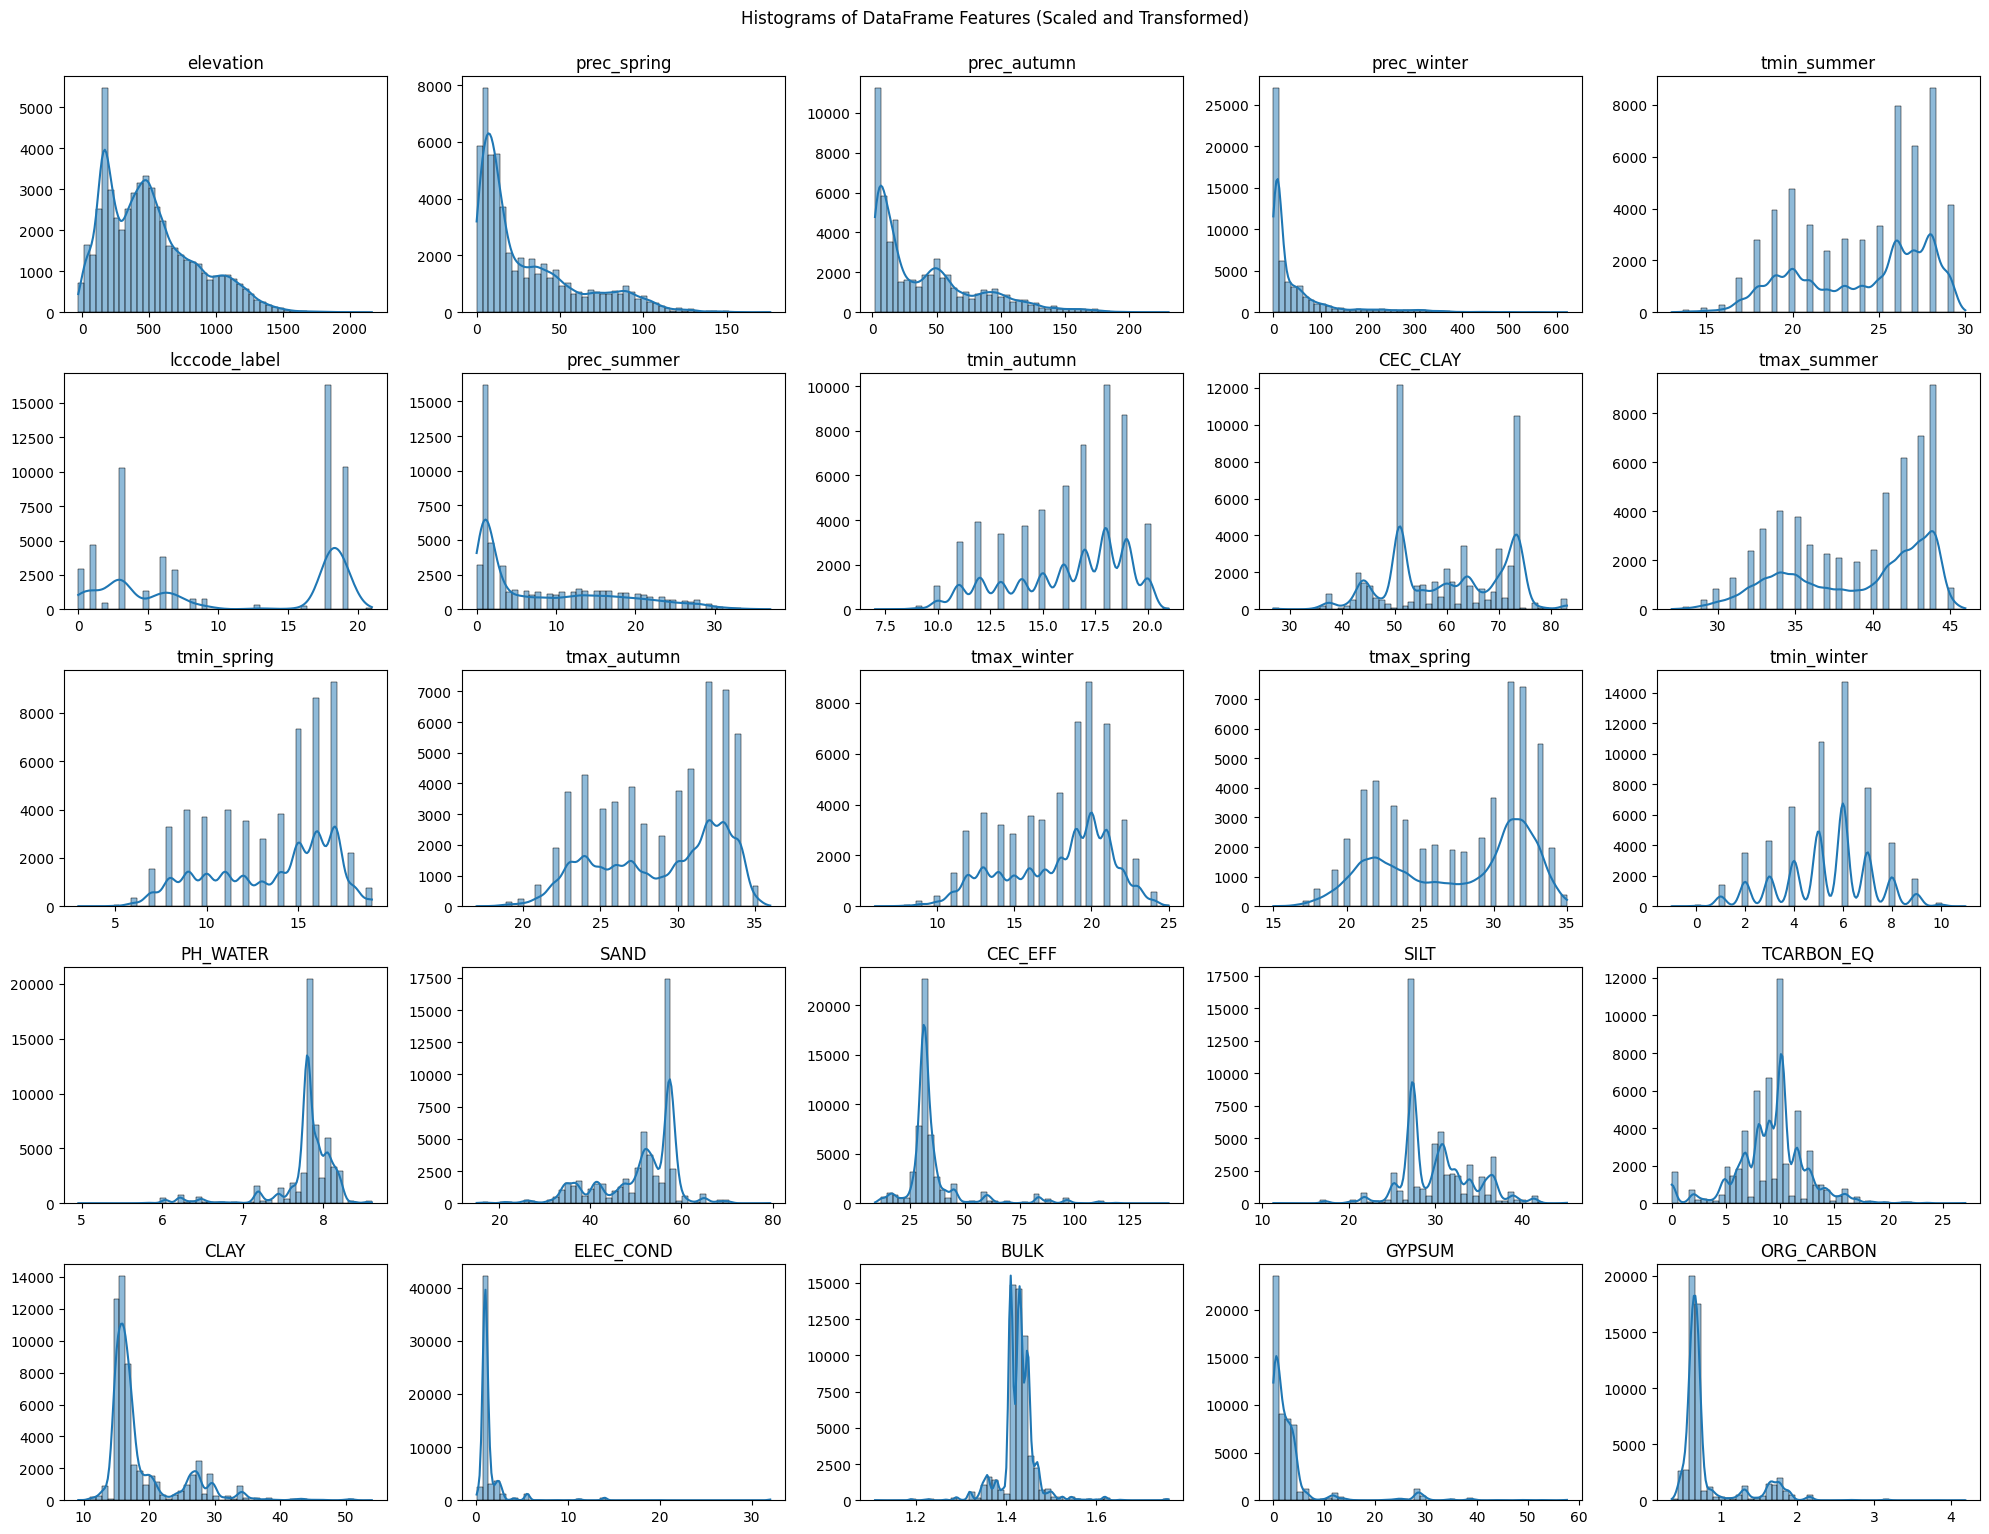

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numerical columns from X_train_scaled, excluding the target variable 'fire'
numerical_cols_to_plot = X.select_dtypes(include=['float64', 'int64']).columns.drop('fire', errors='ignore')

# Calculate grid dimensions dynamically
num_plots = len(numerical_cols_to_plot)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X[col], kde=True, bins=50) # Explicitly setting bins to prevent ValueError
    plt.title(col)
    plt.xlabel('') # Clear x-axis label to avoid clutter in subplots
    plt.ylabel('') # Clear y-axis label
plt.tight_layout()
plt.suptitle('Histograms of DataFrame Features (Scaled and Transformed)', y=1.02) # Add a main title
plt.show()

#### box-cox transformation

#### prec transformation (yeo-jhonson transformation)

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Initialize Yeo-Johnson transformer
pt_yj = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the precipitation columns
X[prec_cols] = pt_yj.fit_transform(X[prec_cols])

# Check transformed values
print(X[prec_cols].describe())


        prec_autumn   prec_spring   prec_summer   prec_winter
count  5.521900e+04  5.521900e+04  5.521900e+04  5.521900e+04
mean  -4.982382e-16  3.325019e-16  8.235342e-17 -2.017659e-16
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00
min   -1.776712e+00 -2.185995e+00 -1.707423e+00 -2.945137e+00
25%   -8.467354e-01 -6.730773e-01 -9.840395e-01 -5.973525e-01
50%    4.248939e-02 -1.396538e-01 -7.779281e-02 -2.157425e-01
75%    8.102963e-01  7.981465e-01  9.954798e-01  8.227724e-01
max    2.182962e+00  2.298241e+00  1.741248e+00  2.166293e+00


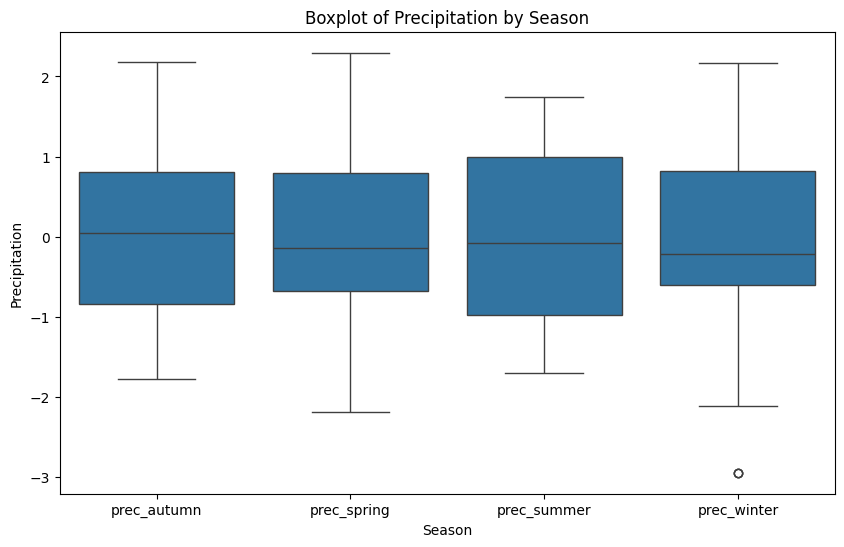

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select precipitation columns
prec_cols = ['prec_autumn', 'prec_spring', 'prec_summer', 'prec_winter']

# Melt the dataframe to long format for seaborn
prec_long = X[prec_cols].melt(var_name='Season', value_name='Precipitation')

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Precipitation', data=prec_long)
plt.title('Boxplot of Precipitation by Season')
plt.ylabel('Precipitation')
plt.xlabel('Season')
plt.show()


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      55219 non-null  float64
 1   prec_spring    55219 non-null  float64
 2   prec_autumn    55219 non-null  float64
 3   prec_winter    55219 non-null  float64
 4   tmin_summer    55219 non-null  int64  
 5   lcccode_label  55219 non-null  float64
 6   prec_summer    55219 non-null  float64
 7   tmin_autumn    55219 non-null  int64  
 8   CEC_CLAY       55219 non-null  float64
 9   tmax_summer    55219 non-null  int64  
 10  tmin_spring    55219 non-null  int64  
 11  tmax_autumn    55219 non-null  int64  
 12  tmax_winter    55219 non-null  int64  
 13  tmax_spring    55219 non-null  int64  
 14  tmin_winter    55219 non-null  int64  
 15  PH_WATER       55219 non-null  float64
 16  SAND           55219 non-null  float64
 17  CEC_EFF        55219 non-null  float64
 18  SILT  

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select the specific transformed features for plotting
# selected_transformed_features = ['GYPSUM']

# # Plot histograms for each selected feature
# plt.figure(figsize=(15, 5))
# for i, col in enumerate(selected_transformed_features):
#     plt.subplot(1, 1, i + 1) # Adjust subplot grid for 3 plots
#     sns.histplot(X_train[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# skewed_features = ['GYPSUM','BSAT','ORG_CARBON']

# pt_bc = PowerTransformer(method='yeo-johnson')  # or 'box-cox' if all positive
# X_train[skewed_features] = pt_bc.fit_transform(X_train[skewed_features])

# X_train['GYPSUM_yj']=pt_bc.fit_transform(X_train[['GYPSUM']])
# X_train['BSAT_yj']=pt_bc.fit_transform(X_train[['BSAT']])
# X_train['ORG_CARBON_yj']=pt_bc.fit_transform(X_train[['ORG_CARBON']])



#### cool and cold seasons for tmin and tmax

In [ ]:
tmin_cols=['tmin_autumn','tmin_spring','tmin_summer','tmin_winter']
tmax_cols=['tmax_autumn','tmax_spring','tmax_summer','tmax_winter']
X['tmax_cool']=X[['tmax_summer','tmax_spring']].mean(axis=1)
X['tmax_cold']=X[['tmax_autumn','tmax_winter']].mean(axis=1)
X['tmin_cool']=X[['tmin_summer','tmin_spring']].mean(axis=1)
X['tmin_cold']=X[['tmin_autumn','tmin_winter']].mean(axis=1)
X=X.drop(columns=tmin_cols+tmax_cols)
X.head()

,elevation,prec_spring,prec_autumn,prec_winter,lcccode_label,prec_summer,CEC_CLAY,PH_WATER,SAND,CEC_EFF,...,TCARBON_EQ,CLAY,ELEC_COND,BULK,GYPSUM,ORG_CARBON,tmax_cool,tmax_cold,tmin_cool,tmin_cold
0,1043.0,0.090687,0.042489,0.474817,18.0,0.241303,51.0,7.80,57.5,31.5,...,10.10,15.0,1.0,1.410,0.250000,0.7040,33.0,22.0,18.5,9.5
1,528.0,-0.870946,-1.395781,-0.703649,18.0,-0.984040,71.9,7.73,58.7,30.5,...,6.87,16.1,2.3,1.435,4.280000,0.5969,36.5,26.0,20.5,11.5
2,900.0,-0.588001,0.074440,-0.277909,18.0,0.995480,51.0,7.80,57.5,31.5,...,10.10,15.0,1.0,1.410,0.250000,0.7040,33.0,21.5,17.5,8.5
3,-1.0,0.379174,0.440903,0.073505,3.0,0.241303,61.4,8.04,50.6,35.2,...,11.86,17.2,1.2,1.442,0.300000,0.6994,35.0,24.5,21.5,13.0
4,977.0,0.554780,0.729118,0.732324,7.0,1.350428,61.0,8.14,48.4,59.9,...,14.02,17.7,1.3,1.411,11.810001,0.6256,28.5,18.5,14.0,7.5


#### Standard Scaler for the remaining features:

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      55219 non-null  float64
 1   prec_spring    55219 non-null  float64
 2   prec_autumn    55219 non-null  float64
 3   prec_winter    55219 non-null  float64
 4   lcccode_label  55219 non-null  float64
 5   prec_summer    55219 non-null  float64
 6   CEC_CLAY       55219 non-null  float64
 7   PH_WATER       55219 non-null  float64
 8   SAND           55219 non-null  float64
 9   CEC_EFF        55219 non-null  float64
 10  SILT           55219 non-null  float64
 11  TCARBON_EQ     55219 non-null  float64
 12  CLAY           55219 non-null  float64
 13  ELEC_COND      55219 non-null  float64
 14  BULK           55219 non-null  float64
 15  GYPSUM         55219 non-null  float64
 16  ORG_CARBON     55219 non-null  float64
 17  tmax_cool      55219 non-null  float64
 18  tmax_c

In [ ]:
from sklearn.preprocessing import StandardScaler

# numeric features to scale
num_features = ['elevation','SILT','SAND','BULK','TCARBON_EQ','CLAY','ORG_CARBON','PH_WATER','CEC_CLAY','CEC_EFF','tmin_cold','tmax_cold','tmin_cool','tmax_cool']

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_features] = scaler.fit_transform(X_scaled[num_features])


In [ ]:
X=X_scaled

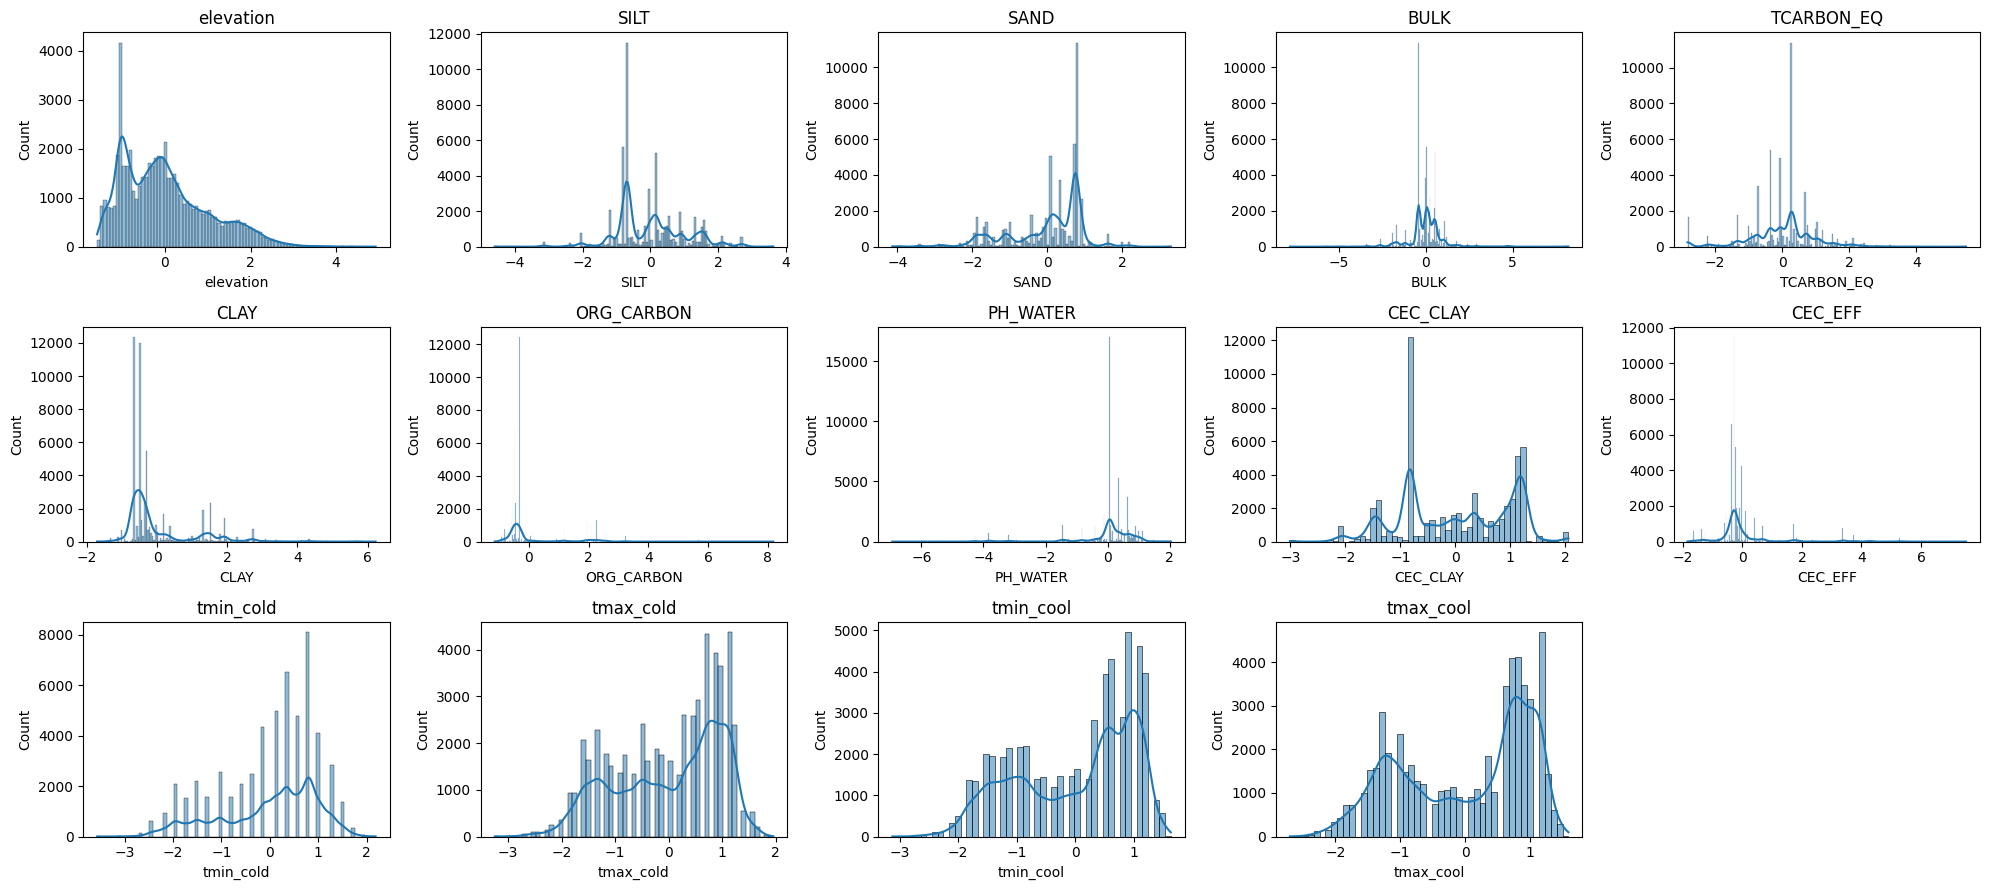

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of numerical features from the 'num_features' variable
# The num_features variable is already defined in the kernel state

# Calculate grid dimensions dynamically
num_plots = len(num_features)
num_cols = 5 # Maximum 5 columns for better readability
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(num_cols * 4, num_rows * 3))
for i, col in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_scaled[col], kde=True) # Assuming X_train_scaled is the dataframe with scaled features
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   elevation      55219 non-null  float64
 1   prec_spring    55219 non-null  float64
 2   prec_autumn    55219 non-null  float64
 3   prec_winter    55219 non-null  float64
 4   lcccode_label  55219 non-null  float64
 5   prec_summer    55219 non-null  float64
 6   CEC_CLAY       55219 non-null  float64
 7   PH_WATER       55219 non-null  float64
 8   SAND           55219 non-null  float64
 9   CEC_EFF        55219 non-null  float64
 10  SILT           55219 non-null  float64
 11  TCARBON_EQ     55219 non-null  float64
 12  CLAY           55219 non-null  float64
 13  ELEC_COND      55219 non-null  float64
 14  BULK           55219 non-null  float64
 15  GYPSUM         55219 non-null  float64
 16  ORG_CARBON     55219 non-null  float64
 17  tmax_cool      55219 non-null  float64
 18  tmax_c

### feature Extraction

#### extract strongly correlated features

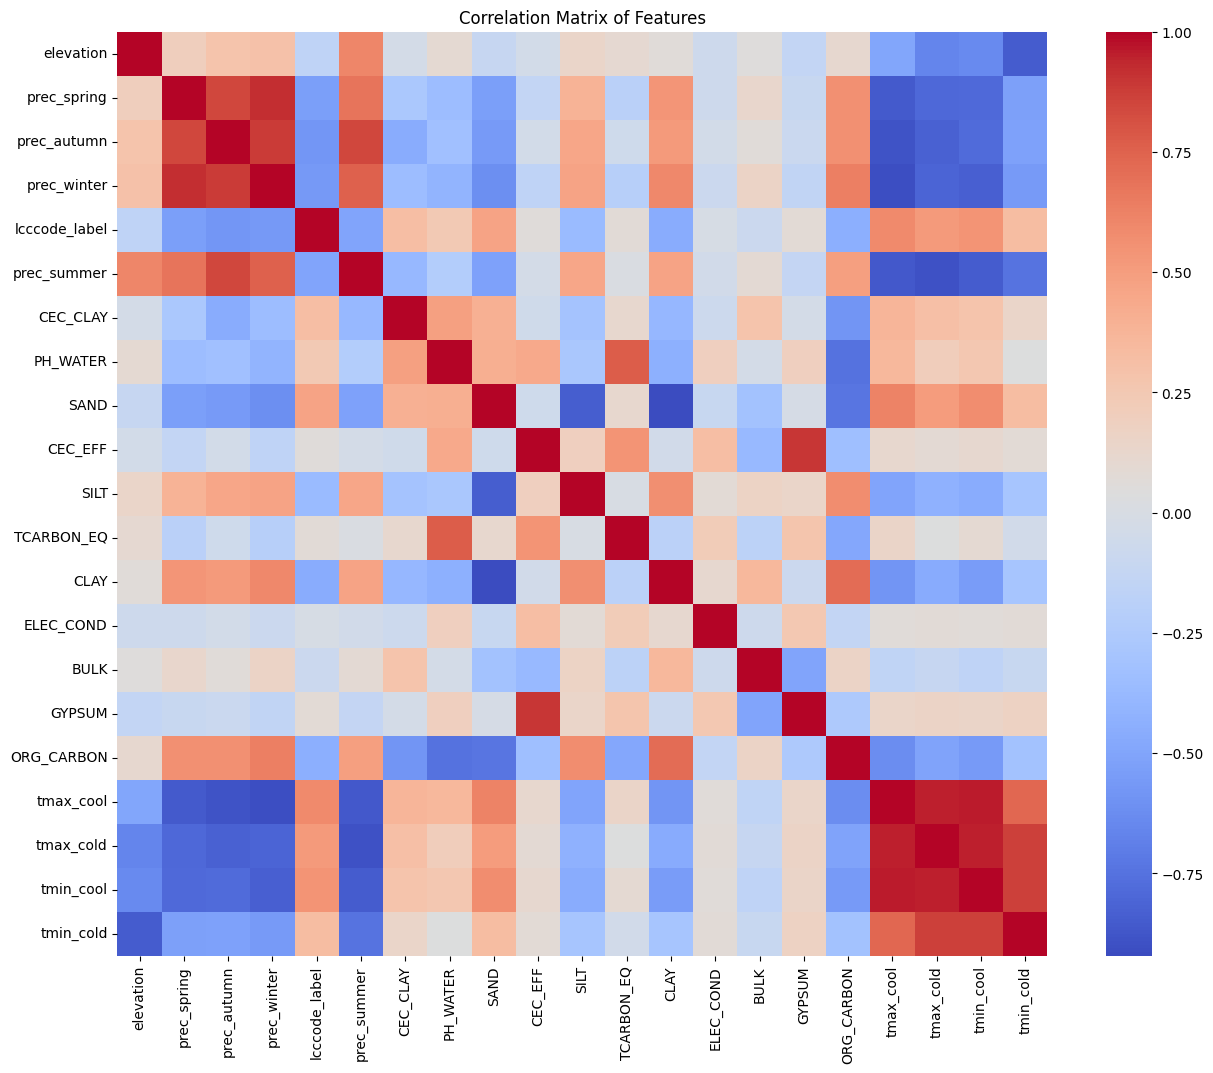

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation
# Exclude target 'fire'
numeric_features =X

# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Plot correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
# Set correlation threshold
threshold = 0.95

# Select upper triangle of correlation matrix (to avoid duplicates)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
strong_corr_pairs = [(col, row, upper.loc[row, col])
                     for col in upper.columns
                     for row in upper.index
                     if (upper.loc[row, col] > threshold)]

# Convert to DataFrame for easier visualization
strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature_1', 'Feature_2', 'Correlation'])

print(strong_corr_df)


   Feature_1  Feature_2  Correlation
0  tmin_cool  tmax_cool     0.956877
1  tmin_cool  tmax_cold     0.950784


#### pca between tmin and tmax

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

temp_features = X[['tmax_cool','tmin_cool','tmax_cold']]
pca = PCA(n_components=0.95)
temp_pca = pca.fit_transform(temp_features)
print("Number of components:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)


Number of components: 1
Explained variance: [0.96782915]


In [ ]:
X['temp_PC']=temp_pca[:,0]
X=X.drop(columns=['tmax_cool','tmin_cool'])

In [ ]:
X=X.drop(columns=['tmax_cold'])

#### for ref_bulk and clay

#### for TEB and cec_EFF

## Oversampling fire instances

### Random Oversampling

((84952, 19), (84952,), np.int64(42476))

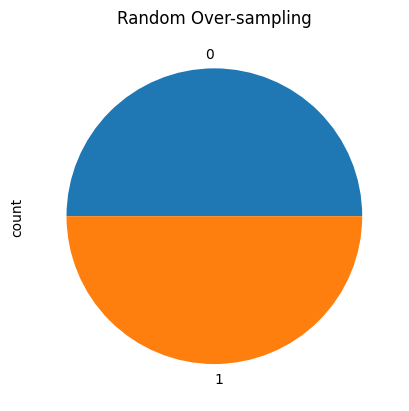

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res_o, y_res_o = ros.fit_resample(X, y)
ax=y_res_o.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_o.shape, y_res_o.shape, y_res_o.sum()

In [ ]:
#save in df_balanced_or
df_balanced_or = pd.concat([X_res_o, y_res_o], axis=1)

###  smote

((84952, 19), (84952,), np.int64(42476))

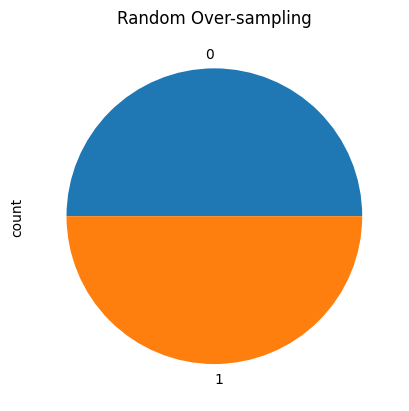

In [ ]:
from imblearn.over_sampling import SMOTE
rosks =SMOTE(random_state=42)
X_res_oks, y_res_oks = rosks.fit_resample(X, y)
ax=y_res_oks.value_counts().plot.pie()
_ = ax.set_title("Random Over-sampling")
X_res_oks.shape, y_res_oks.shape, y_res_oks.sum()

In [ ]:
test = pd.concat([X_res_oks, y_res_oks], axis=1)
test['fire'].value_counts()
X=X_res_oks
y=y_res_oks

## Unsupervised models


### K-means


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
X_scaled=X

In [ ]:
# Range of k values to test
K_range = range(2, 11)

# Storage for metrics
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate all metrics
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X)

    # Inertia (lower is better, but look for "elbow")
    inertias.append(kmeans.inertia_)

    # Silhouette Score (higher is better, range: -1 to 1)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

    # Davies-Bouldin Index (lower is better)
    db_score = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(db_score)

    # Calinski-Harabasz Index (higher is better)
    ch_score = calinski_harabasz_score(X, labels)
    calinski_harabasz_scores.append(ch_score)

    print(f"K={k} | Inertia: {kmeans.inertia_:.2f} | Silhouette: {sil_score:.3f} | "
          f"Davies-Bouldin: {db_score:.3f} | Calinski-Harabasz: {ch_score:.2f}")

K=2 | Inertia: 4554635.39 | Silhouette: 0.594 | Davies-Bouldin: 0.686 | Calinski-Harabasz: 92870.28
K=3 | Inertia: 2293931.05 | Silhouette: 0.643 | Davies-Bouldin: 0.551 | Calinski-Harabasz: 134055.88
K=4 | Inertia: 1993104.23 | Silhouette: 0.522 | Davies-Bouldin: 1.074 | Calinski-Harabasz: 107132.30
K=5 | Inertia: 1799308.35 | Silhouette: 0.529 | Davies-Bouldin: 1.086 | Calinski-Harabasz: 91289.89
K=6 | Inertia: 1623669.90 | Silhouette: 0.384 | Davies-Bouldin: 1.150 | Calinski-Harabasz: 82768.62
K=7 | Inertia: 1453011.88 | Silhouette: 0.385 | Davies-Bouldin: 1.190 | Calinski-Harabasz: 78737.16
K=8 | Inertia: 1297725.44 | Silhouette: 0.397 | Davies-Bouldin: 1.110 | Calinski-Harabasz: 77015.58
K=9 | Inertia: 1231216.99 | Silhouette: 0.415 | Davies-Bouldin: 1.148 | Calinski-Harabasz: 71601.67
K=10 | Inertia: 1098733.88 | Silhouette: 0.409 | Davies-Bouldin: 1.020 | Calinski-Harabasz: 72457.39


In [ ]:
# Create a summary table
import pandas as pd

results_df = pd.DataFrame({
    'K': list(K_range),
    'Inertia': inertias,
    'Silhouette': silhouette_scores,
    'Davies_Bouldin': davies_bouldin_scores,
    'Calinski_Harabasz': calinski_harabasz_scores
})

# Normalize scores for comparison (0-1 scale)
# For metrics where higher is better
results_df['Silhouette_Norm'] = (results_df['Silhouette'] - results_df['Silhouette'].min()) / \
                                  (results_df['Silhouette'].max() - results_df['Silhouette'].min())
results_df['CH_Norm'] = (results_df['Calinski_Harabasz'] - results_df['Calinski_Harabasz'].min()) / \
                         (results_df['Calinski_Harabasz'].max() - results_df['Calinski_Harabasz'].min())

# For metrics where lower is better (invert)
results_df['DB_Norm'] = 1 - ((results_df['Davies_Bouldin'] - results_df['Davies_Bouldin'].min()) / \
                              (results_df['Davies_Bouldin'].max() - results_df['Davies_Bouldin'].min()))

# Combined score (average of normalized metrics)
results_df['Combined_Score'] = (results_df['Silhouette_Norm'] +
                                 results_df['CH_Norm'] +
                                 results_df['DB_Norm']) / 3

print(results_df[['K', 'Silhouette', 'Davies_Bouldin', 'Calinski_Harabasz', 'Combined_Score']])
print(f"\nRecommended K based on combined score: {results_df.loc[results_df['Combined_Score'].idxmax(), 'K']}")

    K  Silhouette  Davies_Bouldin  Calinski_Harabasz  Combined_Score
0   2    0.594407        0.685696       92870.283675        0.646887
1   3    0.643421        0.551036      134055.875965        1.000000
2   4    0.521512        1.073630      107132.299190        0.426878
3   5    0.528827        1.085614       91289.888482        0.345481
4   6    0.384306        1.149654       82768.615861        0.080680
5   7    0.384637        1.190065       78737.159178        0.038509
6   8    0.397405        1.109572       77015.581929        0.087733
7   9    0.415203        1.148457       71601.666833        0.061450
8  10    0.408874        1.019710       72457.390992        0.125033

Recommended K based on combined score: 3


In [ ]:
# Choose optimal k (e.g., k=2 for fire/no-fire pattern)
optimal_k = 3

kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10,
    max_iter=300
)

# Fit and predict clusters
clusters = kmeans.fit_predict(X)

In [ ]:
X_copy=X.copy()

In [ ]:
# Analyze clusters
print("Cluster Centers (Scaled Space):")
print(pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X.columns,
    index=[f'Cluster {i}' for i in range(optimal_k)]
))

# Add clusters to dataframe
X_with_clusters = X.copy()
X_with_clusters['cluster'] = clusters

# Get cluster statistics
print("\nCluster Statistics:")
print(X_with_clusters.groupby('cluster').describe())

# Cluster sizes
print("\nCluster Sizes:")
print(X_with_clusters['cluster'].value_counts().sort_index())

Cluster Centers (Scaled Space):
           elevation  prec_spring  prec_autumn  prec_winter  lcccode_label  \
Cluster 0   0.023706     0.542960     0.572438     0.563147       3.369018   
Cluster 1  -0.362485    -0.473180    -0.691667    -0.578969      18.296056   
Cluster 2  -0.772729    -0.379307    -0.127179    -0.529442      11.946005   

           prec_summer  CEC_CLAY  PH_WATER      SAND   CEC_EFF      SILT  \
Cluster 0     0.473889 -0.336230 -0.334406 -0.494271 -0.220442  0.385093   
Cluster 1    -0.702493  0.460109  0.146794  0.546353 -0.246162 -0.499838   
Cluster 2    -0.440658 -0.776927  0.469890 -0.174435  3.680088  0.717018   

           TCARBON_EQ      CLAY  ELEC_COND      BULK     GYPSUM  ORG_CARBON  \
Cluster 0   -0.145258  0.479232   1.438970  0.236849   1.727288    0.500445   
Cluster 1   -0.082416 -0.475546   1.284760  0.014840   2.518494   -0.401453   
Cluster 2    1.099159 -0.255415   3.910446 -2.195323  30.769029   -0.789581   

           tmin_cold   temp_PC  


Results shape: (84952, 20)
Cluster distribution:
cluster
0    36429
1    45579
2     2944
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


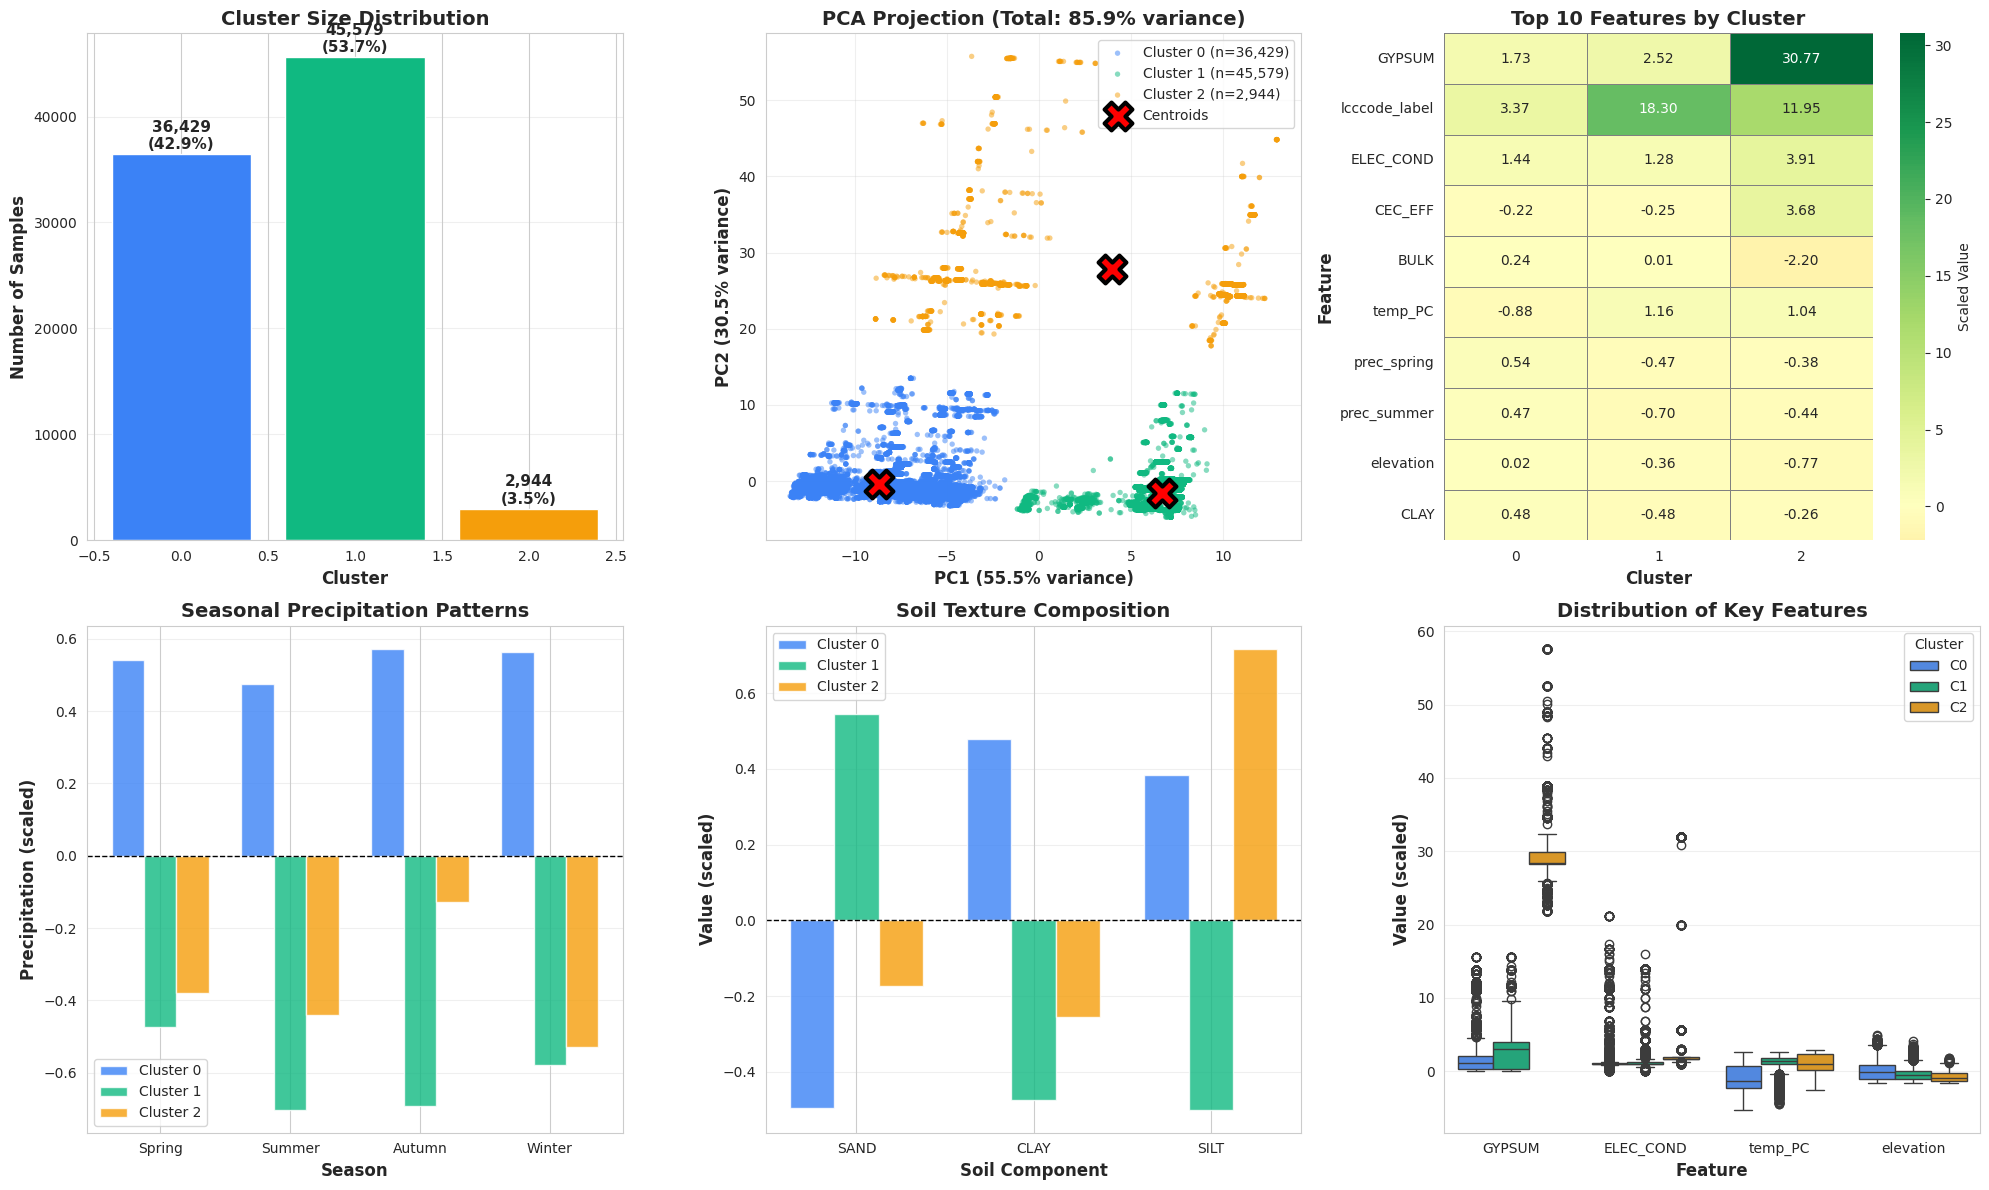

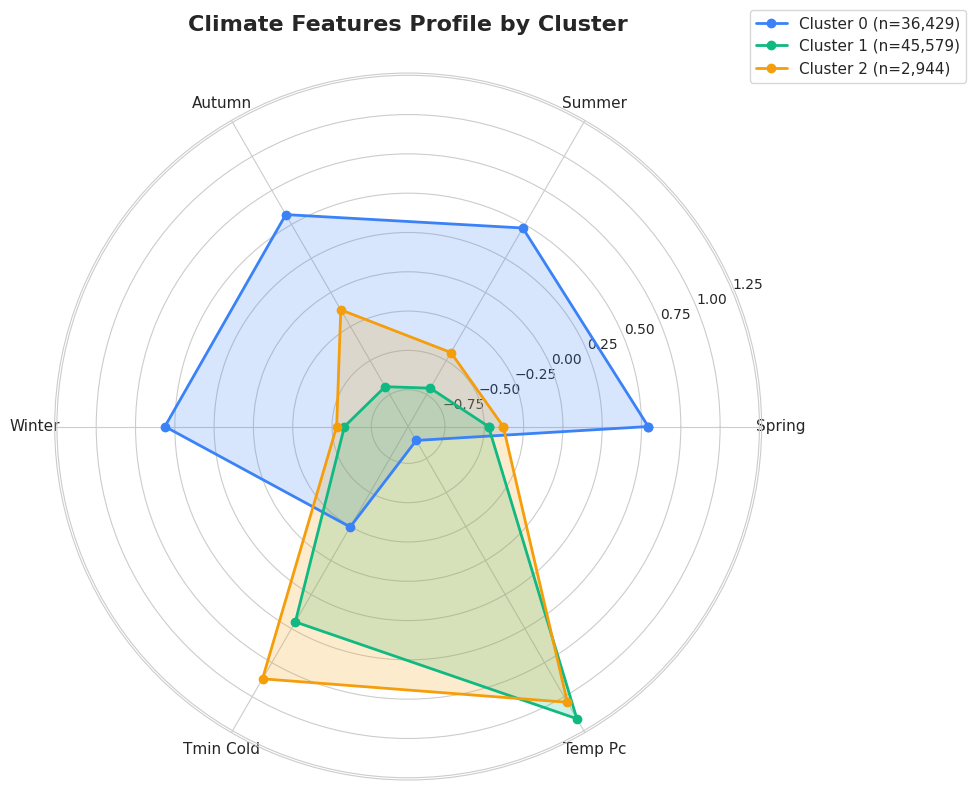

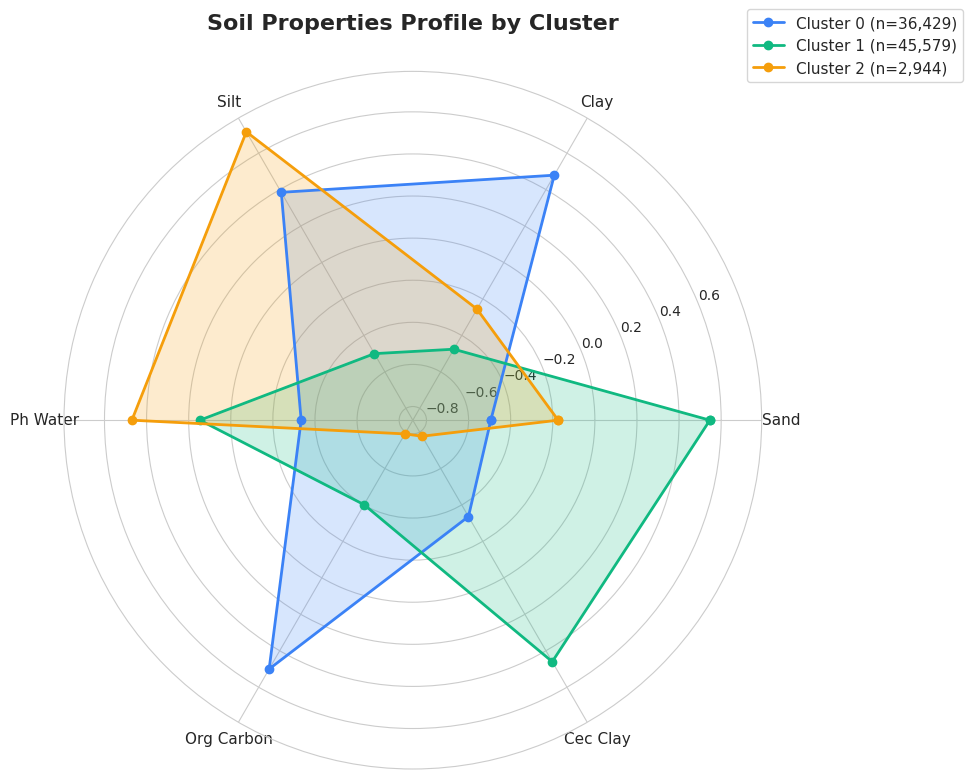

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


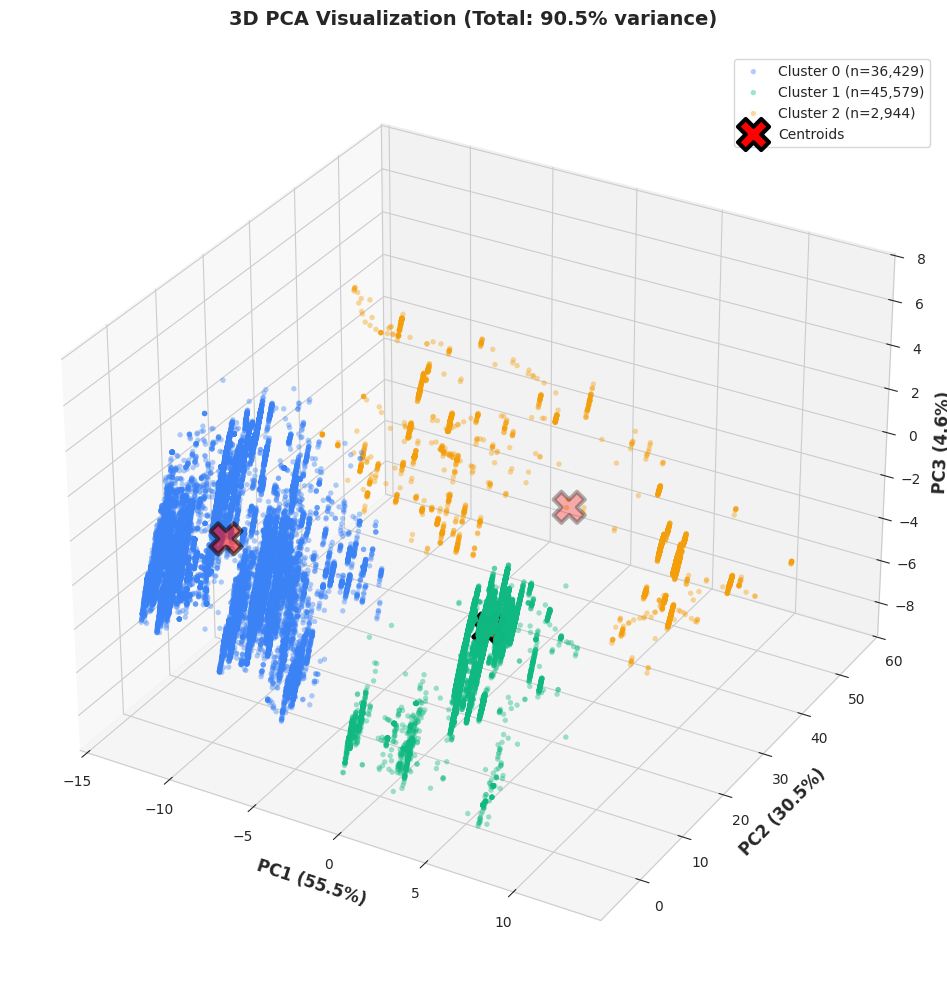

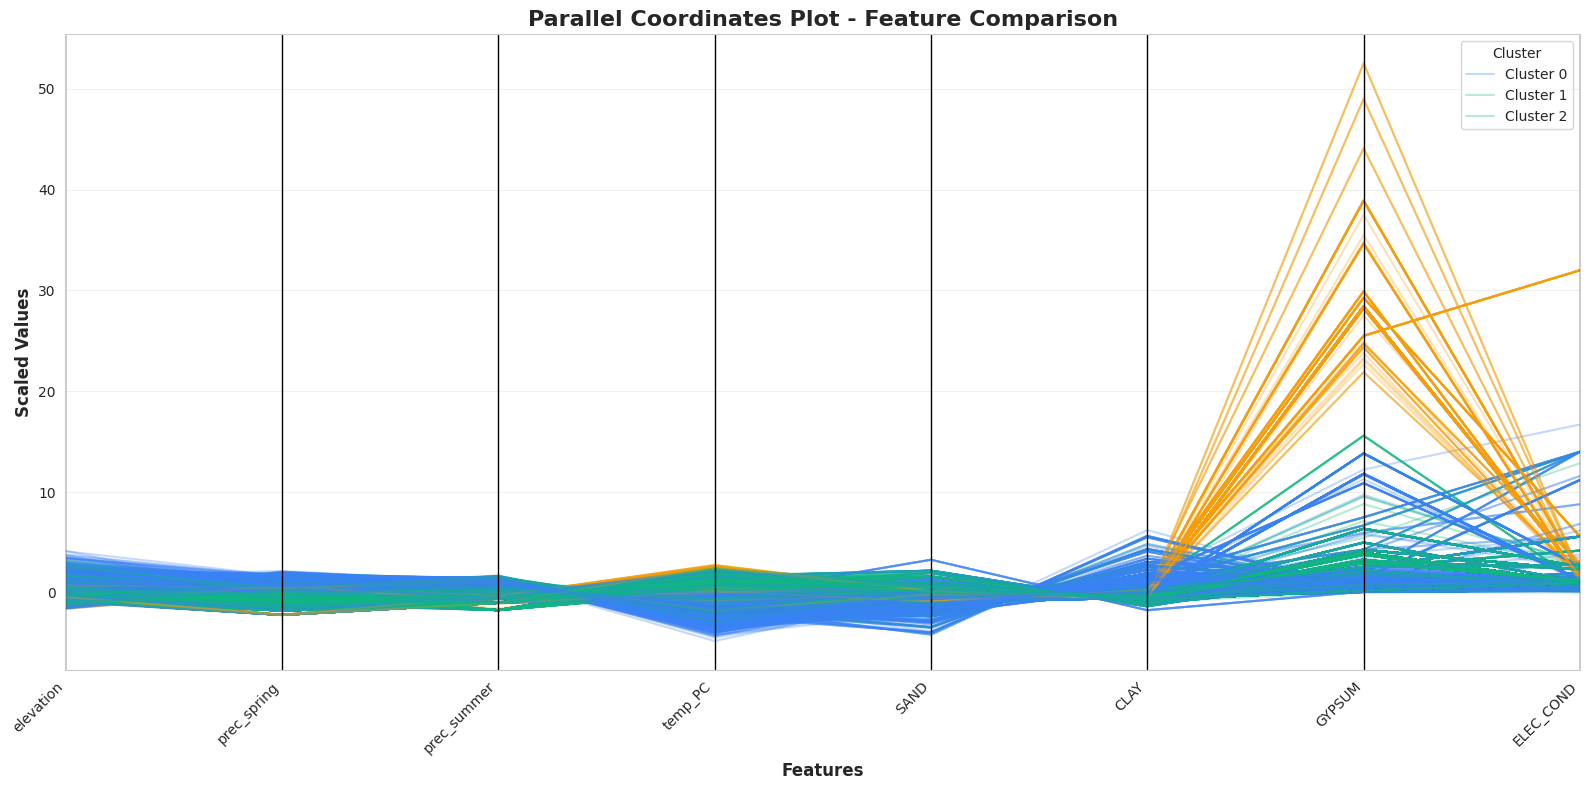

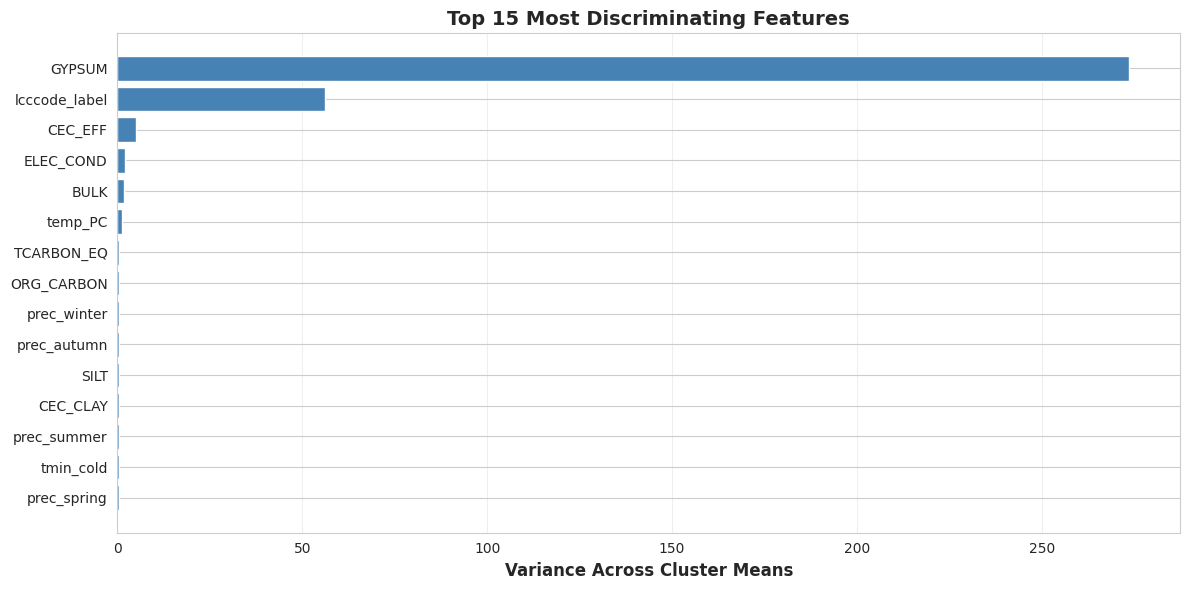


CLUSTER SUMMARY STATISTICS
        elevation        prec_spring        temp_PC         GYPSUM         \
             mean    std        mean    std    mean    std    mean    std   
cluster                                                                     
0           0.024  1.109       0.543  0.965  -0.882  1.645   1.727  2.312   
1          -0.362  0.763      -0.473  0.599   1.162  1.024   2.518  1.897   
2          -0.773  0.597      -0.379  1.197   1.041  1.225  30.769  6.809   

        ELEC_COND          SAND          CLAY         
             mean    std   mean    std   mean    std  
cluster                                               
0           1.439  1.855 -0.494  1.166  0.479  1.247  
1           1.285  0.999  0.546  0.543 -0.476  0.420  
2           3.910  7.021 -0.174  0.503 -0.255  0.342  

CLUSTER SIZES
Cluster 0: 36,429 samples (42.88%)
Cluster 1: 45,579 samples (53.65%)
Cluster 2: 2,944 samples (3.47%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from math import pi

# Create results dataframe (X_scaled with cluster labels)
results = X_scaled.copy()
results['cluster'] = clusters

print(f"Results shape: {results.shape}")
print(f"Cluster distribution:\n{results['cluster'].value_counts().sort_index()}")

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Define colors for clusters
colors_palette = ['#3b82f6', '#10b981', '#f59e0b']

# ============================================================================
# 1. COMPREHENSIVE CLUSTER VISUALIZATION (6 subplots)
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# --- Plot 1: Cluster Size Distribution ---
cluster_sizes = results['cluster'].value_counts().sort_index()
axes[0, 0].bar(cluster_sizes.index, cluster_sizes.values, color=colors_palette)
axes[0, 0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')
for i, v in enumerate(cluster_sizes.values):
    axes[0, 0].text(i, v + 500, f'{v:,}\n({v/len(results)*100:.1f}%)',
                    ha='center', fontsize=11, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# --- Plot 2: PCA 2D Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for i, color in enumerate(colors_palette):
    mask = clusters == i
    axes[0, 1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                      c=color, label=f'Cluster {i} (n={cluster_sizes[i]:,})',
                      alpha=0.5, s=15, edgecolors='none')

# Plot centroids
centers_pca = pca.transform(kmeans.cluster_centers_)
axes[0, 1].scatter(centers_pca[:, 0], centers_pca[:, 1],
                  marker='X', s=400, c='red', edgecolors='black',
                  linewidths=3, label='Centroids', zorder=5)

axes[0, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'PCA Projection (Total: {pca.explained_variance_ratio_.sum():.1%} variance)',
                    fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='best', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# --- Plot 3: Top Features Heatmap ---
top_features = ['GYPSUM', 'lcccode_label', 'ELEC_COND', 'CEC_EFF', 'BULK',
                'temp_PC', 'prec_spring', 'prec_summer', 'elevation', 'CLAY']
cluster_means = results.groupby('cluster')[top_features].mean()

sns.heatmap(cluster_means.T, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, ax=axes[0, 2], cbar_kws={'label': 'Scaled Value'},
            linewidths=0.5, linecolor='gray')
axes[0, 2].set_title('Top 10 Features by Cluster', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Feature', fontsize=12, fontweight='bold')

# --- Plot 4: Precipitation Patterns ---
precip_features = ['prec_spring', 'prec_summer', 'prec_autumn', 'prec_winter']
precip_data = results.groupby('cluster')[precip_features].mean()

x = np.arange(len(precip_features))
width = 0.25

for i in range(3):
    axes[1, 0].bar(x + i*width, precip_data.iloc[i], width,
                   label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

axes[1, 0].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Precipitation (scaled)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Seasonal Precipitation Patterns', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x + width)
axes[1, 0].set_xticklabels([f.replace('prec_', '').title() for f in precip_features])
axes[1, 0].legend()
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 0].grid(axis='y', alpha=0.3)

# --- Plot 5: Soil Texture Comparison ---
soil_features = ['SAND', 'CLAY', 'SILT']
soil_data = results.groupby('cluster')[soil_features].mean()

x = np.arange(len(soil_features))
width = 0.25

for i in range(3):
    axes[1, 1].bar(x + i*width, soil_data.iloc[i], width,
                   label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

axes[1, 1].set_xlabel('Soil Component', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Value (scaled)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Soil Texture Composition', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x + width)
axes[1, 1].set_xticklabels(soil_features)
axes[1, 1].legend()
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].grid(axis='y', alpha=0.3)

# --- Plot 6: Box Plot for Key Features ---
key_features_box = ['GYPSUM', 'ELEC_COND', 'temp_PC', 'elevation']
box_data = []
for feature in key_features_box:
    for cluster_id in range(3):
        values = results[results['cluster'] == cluster_id][feature]
        box_data.append({
            'Feature': feature,
            'Cluster': f'C{cluster_id}',
            'Value': values.values
        })

# Flatten for box plot
box_df = pd.DataFrame([
    {'Feature': item['Feature'], 'Cluster': item['Cluster'], 'Value': val}
    for item in box_data
    for val in item['Value']
])

sns.boxplot(data=box_df, x='Feature', y='Value', hue='Cluster',
           palette=colors_palette, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Key Features', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Feature', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Value (scaled)', fontsize=12, fontweight='bold')
axes[1, 2].legend(title='Cluster', loc='best')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 2. RADAR CHART - Climate Features
# ============================================================================
climate_features = ['prec_spring', 'prec_summer', 'prec_autumn',
                   'prec_winter', 'tmin_cold', 'temp_PC']
climate_data = results.groupby('cluster')[climate_features].mean()

categories = [f.replace('prec_', '').replace('_', ' ').title()
              for f in climate_features]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i in range(3):
    values = climate_data.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2,
            label=f'Cluster {i} (n={cluster_sizes[i]:,})',
            color=colors_palette[i])
    ax.fill(angles, values, alpha=0.2, color=colors_palette[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11)
ax.set_title('Climate Features Profile by Cluster',
            fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.grid(True)
plt.tight_layout()
plt.show()

# ============================================================================
# 3. RADAR CHART - Soil Features
# ============================================================================
soil_features_radar = ['SAND', 'CLAY', 'SILT', 'PH_WATER', 'ORG_CARBON', 'CEC_CLAY']
soil_data_radar = results.groupby('cluster')[soil_features_radar].mean()

categories_soil = [f.replace('_', ' ').title() for f in soil_features_radar]
N_soil = len(categories_soil)

angles_soil = [n / float(N_soil) * 2 * pi for n in range(N_soil)]
angles_soil += angles_soil[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i in range(3):
    values = soil_data_radar.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles_soil, values, 'o-', linewidth=2,
            label=f'Cluster {i} (n={cluster_sizes[i]:,})',
            color=colors_palette[i])
    ax.fill(angles_soil, values, alpha=0.2, color=colors_palette[i])

ax.set_xticks(angles_soil[:-1])
ax.set_xticklabels(categories_soil, size=11)
ax.set_title('Soil Properties Profile by Cluster',
            fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.grid(True)
plt.tight_layout()
plt.show()

# ============================================================================
# 4. 3D PCA VISUALIZATION
# ============================================================================
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for i, color in enumerate(colors_palette):
    mask = clusters == i
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=color, label=f'Cluster {i} (n={cluster_sizes[i]:,})',
              alpha=0.4, s=15, edgecolors='none')

# Plot centroids
centers_3d = pca_3d.transform(kmeans.cluster_centers_)
ax.scatter(centers_3d[:, 0], centers_3d[:, 1], centers_3d[:, 2],
          marker='X', s=500, c='red', edgecolors='black',
          linewidths=3, label='Centroids')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})',
             fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})',
             fontsize=12, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})',
             fontsize=12, fontweight='bold')

total_var = pca_3d.explained_variance_ratio_.sum()
ax.set_title(f'3D PCA Visualization (Total: {total_var:.1%} variance)',
            fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# 5. PARALLEL COORDINATES PLOT
# ============================================================================
from pandas.plotting import parallel_coordinates

# Select top features for parallel coordinates
parallel_features = ['elevation', 'prec_spring', 'prec_summer', 'temp_PC',
                    'SAND', 'CLAY', 'GYPSUM', 'ELEC_COND']

# Sample data for better visualization (optional - use all if you want)
sample_size = min(5000, len(results))
results_sample = results.sample(n=sample_size, random_state=42)

parallel_data = results_sample[parallel_features + ['cluster']].copy()
parallel_data['cluster'] = parallel_data['cluster'].astype(str)

plt.figure(figsize=(16, 8))
parallel_coordinates(parallel_data, 'cluster',
                    color=colors_palette, alpha=0.3)
plt.title('Parallel Coordinates Plot - Feature Comparison',
         fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Scaled Values', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', labels=[f'Cluster {i}' for i in range(3)])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 6. FEATURE IMPORTANCE (Variance Between Clusters)
# ============================================================================
# Calculate variance of each feature across cluster means
cluster_means_all = results.groupby('cluster').mean()
feature_variance = cluster_means_all.var().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_variance)), feature_variance.values, color='steelblue')
plt.yticks(range(len(feature_variance)), feature_variance.index)
plt.xlabel('Variance Across Cluster Means', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Discriminating Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 7. SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "="*80)
print("CLUSTER SUMMARY STATISTICS")
print("="*80)

summary_features = ['elevation', 'prec_spring', 'temp_PC', 'GYPSUM',
                   'ELEC_COND', 'SAND', 'CLAY']

summary_stats = results.groupby('cluster')[summary_features].agg(['mean', 'std'])
print(summary_stats.round(3))

print("\n" + "="*80)
print("CLUSTER SIZES")
print("="*80)
for i in range(3):
    size = cluster_sizes[i]
    pct = (size / len(results)) * 100
    print(f"Cluster {i}: {size:,} samples ({pct:.2f}%)")

In [ ]:
# Simple fire risk summary
fire_analysis = pd.DataFrame({
    'cluster': clusters,
    'fire': y
})

# Calculate fire rate per cluster
fire_rate = fire_analysis.groupby('cluster')['fire'].mean() * 100

print("\n🔥 FIRE RISK BY CLUSTER 🔥\n")
print("="*50)

for cluster_id in range(len(fire_rate)):
    rate = fire_rate[cluster_id]

    if rate >= 60:
        risk = "🔴 HIGH RISK"
    elif rate >= 30:
        risk = "🟡 MEDIUM RISK"
    else:
        risk = "🟢 LOW RISK"

    print(f"Cluster {cluster_id}: {risk} ({rate:.1f}% fire occurrence)")

print("="*50)


🔥 FIRE RISK BY CLUSTER 🔥

Cluster 0: 🟡 MEDIUM RISK (38.0% fire occurrence)
Cluster 1: 🔴 HIGH RISK (62.0% fire occurrence)
Cluster 2: 🟢 LOW RISK (12.0% fire occurrence)


FIRE RISK ANALYSIS BY CLUSTER

Cluster Fire Statistics:
         fire_count  total_samples  fire_rate  no_fire_count  fire_percentage
cluster                                                                      
0             13848          36429   0.380137          22581        38.013670
1             28276          45579   0.620373          17303        62.037342
2               352           2944   0.119565           2592        11.956522

FIRE RISK CLASSIFICATION

Cluster 0: MEDIUM RISK
  - Fire Rate: 38.01%
  - Total Samples: 36,429
  - Fire Cases: 13,848
  - No Fire Cases: 22,581

Cluster 1: HIGH RISK
  - Fire Rate: 62.04%
  - Total Samples: 45,579
  - Fire Cases: 28,276
  - No Fire Cases: 17,303

Cluster 2: LOW RISK
  - Fire Rate: 11.96%
  - Total Samples: 2,944
  - Fire Cases: 352
  - No Fire Cases: 2,592


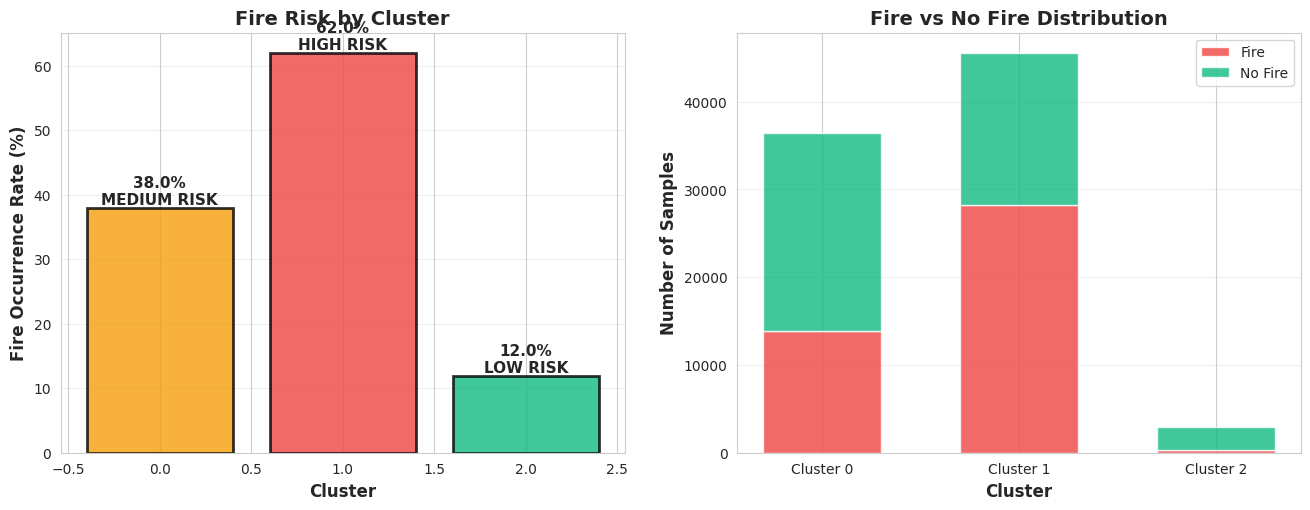

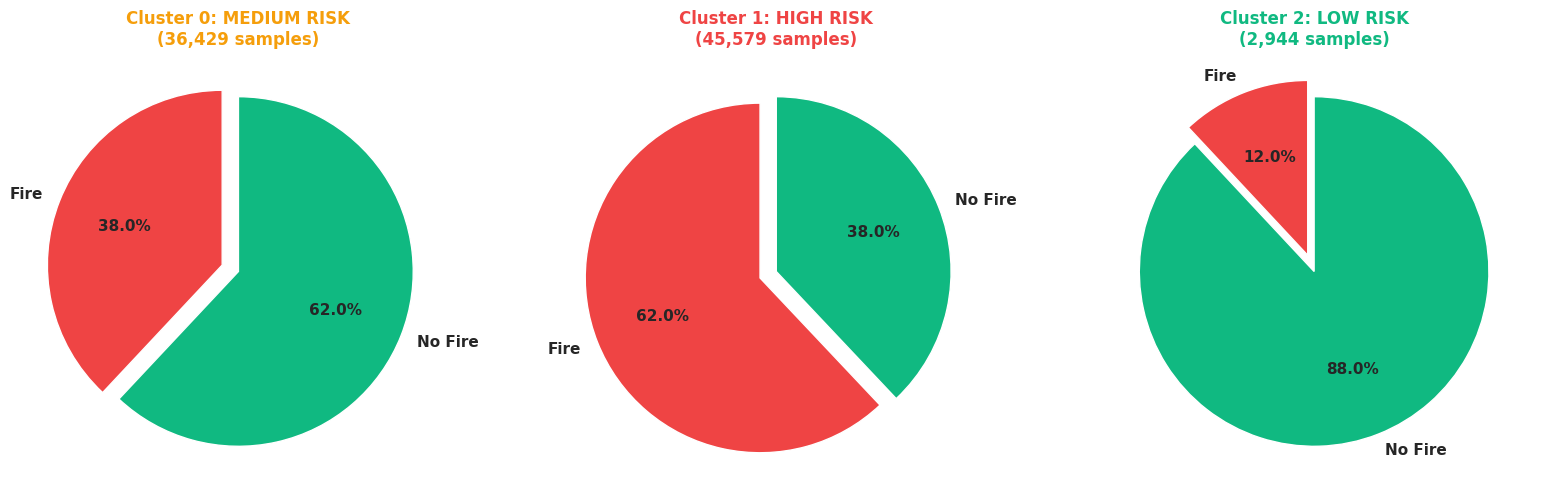

<Figure size 1500x1000 with 0 Axes>


DETAILED BREAKDOWN

Cross-tabulation (Cluster vs Fire):
         No Fire   Fire  Total
cluster                       
0          22581  13848  36429
1          17303  28276  45579
2           2592    352   2944
Total      42476  42476  84952

FEATURE CHARACTERISTICS BY RISK LEVEL

Mean feature values by risk level:
             GYPSUM  ELEC_COND  temp_PC  prec_spring  prec_summer  elevation  \
risk_level                                                                     
HIGH RISK     2.518      1.285    1.162       -0.473       -0.702     -0.362   
LOW RISK     30.769      3.910    1.041       -0.379       -0.441     -0.773   
MEDIUM RISK   1.727      1.439   -0.882        0.543        0.474      0.024   

              SAND   CLAY  
risk_level                 
HIGH RISK    0.546 -0.476  
LOW RISK    -0.174 -0.255  
MEDIUM RISK -0.494  0.479  


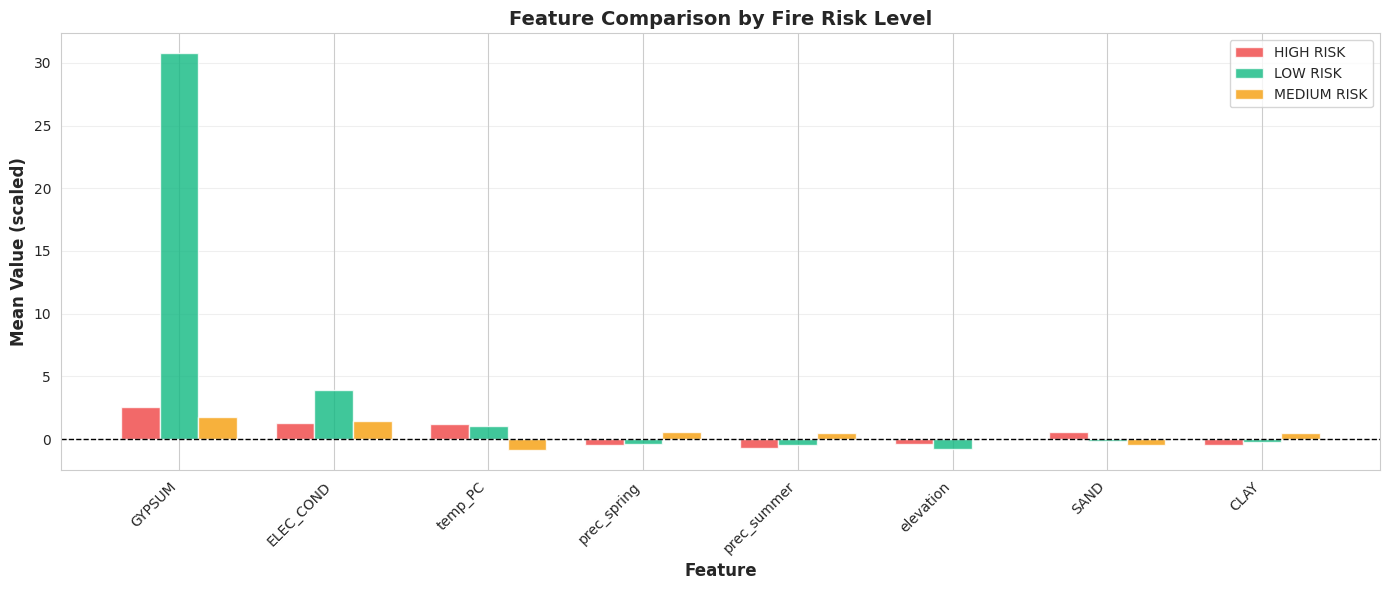


Results saved to 'cluster_fire_risk_analysis.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# ANALYZE FIRE RISK BY CLUSTER
# ============================================================================

# Assuming you have the target variable (fire/no fire)
# Replace 'y' or 'target' with your actual target variable name
# y should be your fire labels (1 = fire, 0 = no fire)

# Create analysis dataframe
fire_analysis = pd.DataFrame({
    'cluster': clusters,
    'fire': y  # Your target variable
})

print("="*80)
print("FIRE RISK ANALYSIS BY CLUSTER")
print("="*80)

# Calculate fire occurrence rate for each cluster
cluster_fire_stats = fire_analysis.groupby('cluster').agg({
    'fire': ['sum', 'count', 'mean']
})

cluster_fire_stats.columns = ['fire_count', 'total_samples', 'fire_rate']
cluster_fire_stats['no_fire_count'] = cluster_fire_stats['total_samples'] - cluster_fire_stats['fire_count']
cluster_fire_stats['fire_percentage'] = cluster_fire_stats['fire_rate'] * 100

print("\nCluster Fire Statistics:")
print(cluster_fire_stats)

# Determine risk level based on fire rate
def classify_risk(fire_rate):
    if fire_rate >= 0.6:
        return 'HIGH RISK'
    elif fire_rate >= 0.3:
        return 'MEDIUM RISK'
    else:
        return 'LOW RISK'

cluster_fire_stats['risk_level'] = cluster_fire_stats['fire_rate'].apply(classify_risk)

print("\n" + "="*80)
print("FIRE RISK CLASSIFICATION")
print("="*80)
for cluster_id in range(len(cluster_fire_stats)):
    stats = cluster_fire_stats.iloc[cluster_id]
    print(f"\nCluster {cluster_id}: {stats['risk_level']}")
    print(f"  - Fire Rate: {stats['fire_percentage']:.2f}%")
    print(f"  - Total Samples: {int(stats['total_samples']):,}")
    print(f"  - Fire Cases: {int(stats['fire_count']):,}")
    print(f"  - No Fire Cases: {int(stats['no_fire_count']):,}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define colors
risk_colors = {
    'HIGH RISK': '#ef4444',
    'MEDIUM RISK': '#f59e0b',
    'LOW RISK': '#10b981'
}
cluster_colors = [risk_colors[risk] for risk in cluster_fire_stats['risk_level']]

# --- Plot 1: Fire Rate by Cluster ---
bars = axes[0, 0].bar(cluster_fire_stats.index,
                      cluster_fire_stats['fire_percentage'],
                      color=cluster_colors, alpha=0.8, edgecolor='black', linewidth=2)

axes[0, 0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Fire Occurrence Rate (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Fire Risk by Cluster', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, (bar, risk) in enumerate(zip(bars, cluster_fire_stats['risk_level'])):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%\n{risk}',
                   ha='center', va='bottom', fontsize=11, fontweight='bold')

# --- Plot 2: Stacked Bar Chart (Fire vs No Fire) ---
x = np.arange(len(cluster_fire_stats))
width = 0.6

axes[0, 1].bar(x, cluster_fire_stats['fire_count'], width,
              label='Fire', color='#ef4444', alpha=0.8)
axes[0, 1].bar(x, cluster_fire_stats['no_fire_count'], width,
              bottom=cluster_fire_stats['fire_count'],
              label='No Fire', color='#10b981', alpha=0.8)

axes[0, 1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Fire vs No Fire Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels([f'Cluster {i}' for i in range(len(cluster_fire_stats))])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# --- Plot 3: Pie Charts for Each Cluster ---
for idx, cluster_id in enumerate(cluster_fire_stats.index):
    row = idx // 2
    col = idx % 2

    if idx < 2:  # Only if we have space (2 clusters in bottom row)
        ax_pie = axes[1, col]

        fire_count = cluster_fire_stats.loc[cluster_id, 'fire_count']
        no_fire_count = cluster_fire_stats.loc[cluster_id, 'no_fire_count']
        risk_level = cluster_fire_stats.loc[cluster_id, 'risk_level']

        colors_pie = ['#ef4444', '#10b981']
        explode = (0.1, 0)

        ax_pie.pie([fire_count, no_fire_count],
                  labels=['Fire', 'No Fire'],
                  autopct='%1.1f%%',
                  colors=colors_pie,
                  explode=explode,
                  startangle=90,
                  textprops={'fontsize': 11, 'fontweight': 'bold'})

        ax_pie.set_title(f'Cluster {cluster_id}: {risk_level}\n({int(cluster_fire_stats.loc[cluster_id, "total_samples"]):,} samples)',
                        fontsize=12, fontweight='bold',
                        color=risk_colors[risk_level])

# If there are 3 clusters, use the remaining space
if len(cluster_fire_stats) == 3:
    # Remove the last subplot and create a new one spanning both columns
    axes[1, 0].remove()
    axes[1, 1].remove()

    # Create pie charts for all 3 clusters
    fig2, axes2 = plt.subplots(1, 3, figsize=(16, 5))

    for idx, cluster_id in enumerate(cluster_fire_stats.index):
        fire_count = cluster_fire_stats.loc[cluster_id, 'fire_count']
        no_fire_count = cluster_fire_stats.loc[cluster_id, 'no_fire_count']
        risk_level = cluster_fire_stats.loc[cluster_id, 'risk_level']

        colors_pie = ['#ef4444', '#10b981']
        explode = (0.1, 0)

        axes2[idx].pie([fire_count, no_fire_count],
                      labels=['Fire', 'No Fire'],
                      autopct='%1.1f%%',
                      colors=colors_pie,
                      explode=explode,
                      startangle=90,
                      textprops={'fontsize': 11, 'fontweight': 'bold'})

        axes2[idx].set_title(f'Cluster {cluster_id}: {risk_level}\n({int(cluster_fire_stats.loc[cluster_id, "total_samples"]):,} samples)',
                            fontsize=12, fontweight='bold',
                            color=risk_colors[risk_level])

    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()

# ============================================================================
# CONFUSION MATRIX-STYLE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("DETAILED BREAKDOWN")
print("="*80)

# Cross-tabulation
crosstab = pd.crosstab(fire_analysis['cluster'],
                       fire_analysis['fire'],
                       margins=True,
                       margins_name='Total')
crosstab.columns = ['No Fire', 'Fire', 'Total']
print("\nCross-tabulation (Cluster vs Fire):")
print(crosstab)

# ============================================================================
# FEATURE COMPARISON BY RISK LEVEL
# ============================================================================

# Add risk level to results dataframe
results['risk_level'] = results['cluster'].map(
    cluster_fire_stats['risk_level'].to_dict()
)

# Compare key features across risk levels
print("\n" + "="*80)
print("FEATURE CHARACTERISTICS BY RISK LEVEL")
print("="*80)

key_features = ['GYPSUM', 'ELEC_COND', 'temp_PC', 'prec_spring',
                'prec_summer', 'elevation', 'SAND', 'CLAY']

risk_comparison = results.groupby('risk_level')[key_features].mean()
print("\nMean feature values by risk level:")
print(risk_comparison.round(3))

# Visualize feature differences by risk level
fig, ax = plt.subplots(figsize=(14, 6))

risk_comparison_T = risk_comparison.T
x = np.arange(len(risk_comparison_T))
width = 0.25

risk_levels = risk_comparison.index.tolist()
for i, risk_level in enumerate(risk_levels):
    color = risk_colors.get(risk_level, '#888888')
    ax.bar(x + i*width, risk_comparison_T[risk_level], width,
           label=risk_level, color=color, alpha=0.8)

ax.set_xlabel('Feature', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Value (scaled)', fontsize=12, fontweight='bold')
ax.set_title('Feature Comparison by Fire Risk Level', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(key_features, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# ============================================================================
# SAVE RESULTS
# ============================================================================

# Save cluster assignments with fire risk
results_with_risk = results.copy()
results_with_risk['fire_actual'] = y
results_with_risk.to_csv('cluster_fire_risk_analysis.csv', index=False)

print("\n" + "="*80)
print("Results saved to 'cluster_fire_risk_analysis.csv'")
print("="*80)

COMPREHENSIVE CLUSTER PROFILING

📊 CLUSTER OVERVIEW:
   Cluster   Size  Fire_Count  Fire_Rate_% Risk_Level
0        0  36429       13848    38.013670     MEDIUM
1        1  45579       28276    62.037342       HIGH
2        2   2944         352    11.956522        LOW


/tmp/ipython-input-1327969457.py:234: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1327969457.py:234: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1327969457.py:234: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1327969457.py:234: UserWarning: Glyph 127964 (\N{DESERT}) missing from font(s) DejaVu Sans.
  plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1327969457.py:234: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
/tmp/

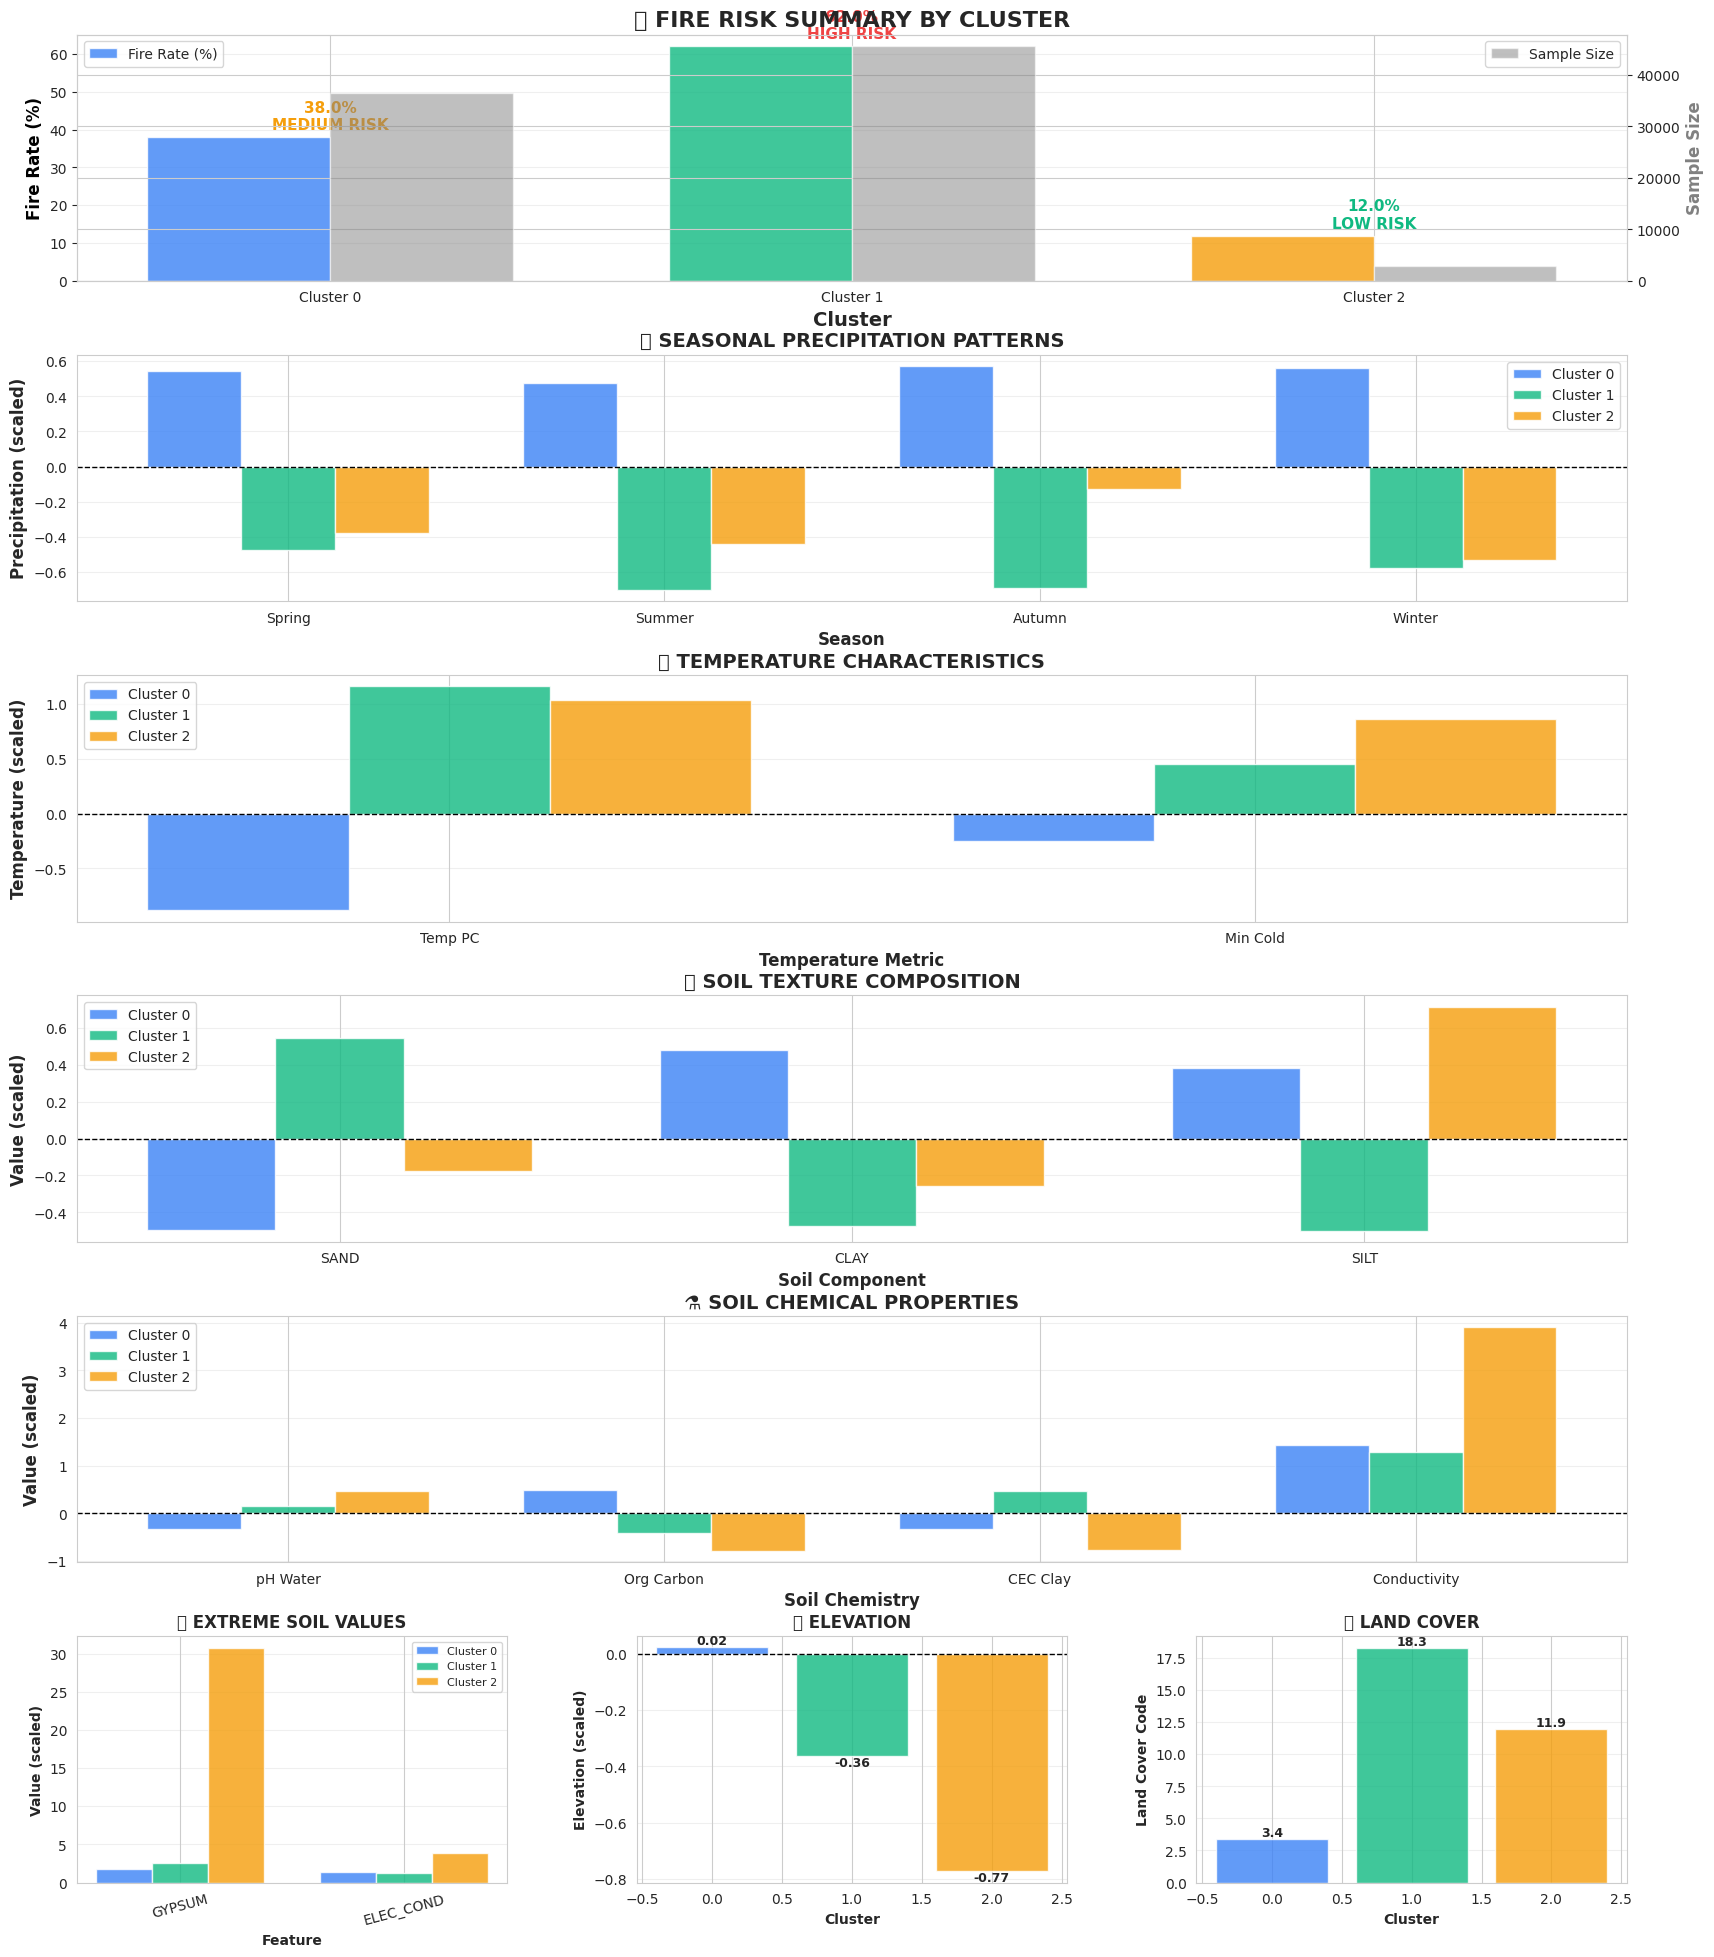


✅ Comprehensive visualization saved as 'comprehensive_cluster_analysis.png'

STATISTICAL TESTS - Feature Differences Between Clusters

ANOVA Results (features that differ significantly between clusters):
       Feature    F-statistic  p-value Significant
0    elevation    2335.997371      0.0       ✅ YES
1  prec_spring   16578.115697      0.0       ✅ YES
2  prec_summer   21930.895258      0.0       ✅ YES
3      temp_PC   24333.109851      0.0       ✅ YES
4       GYPSUM  200503.966921      0.0       ✅ YES
5    ELEC_COND    2563.903422      0.0       ✅ YES
6         SAND   14741.671892      0.0       ✅ YES
7         CLAY   12133.488819      0.0       ✅ YES

📝 CLUSTER CHARACTERIZATION

CLUSTER 0

Risk Level: 🟡 MEDIUM RISK
Fire Occurrence Rate: 38.01%
Sample Size: 36,429 (42.9%)
Fire Cases: 13,848

This cluster shows MODERATE fire risk

🔍 Key Characteristics:
  • Climate: WET (high precipitation across seasons)
  • Temperature: COOL (lower temperatures)
  • Soil Texture: CLAYEY (high clay

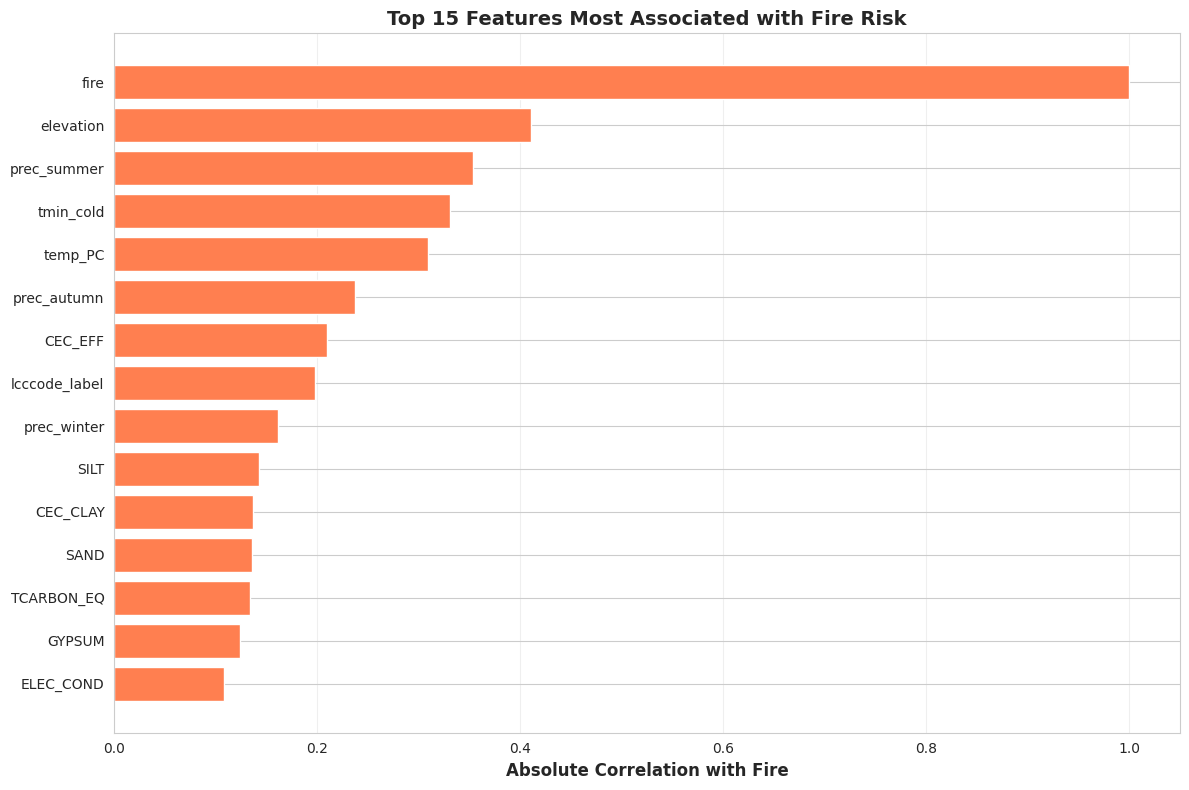


✅ Feature importance visualization saved as 'feature_importance_fire.png'

✅ ANALYSIS COMPLETE

Files saved:
  • comprehensive_cluster_analysis.png
  • feature_importance_fire.png
  • cluster_analysis_complete.csv
  • cluster_profiles_summary.csv
  • cluster_statistical_tests.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ============================================================================
# 1. CLUSTER PROFILING - What Makes Each Cluster Unique?
# ============================================================================

print("="*80)
print("COMPREHENSIVE CLUSTER PROFILING")
print("="*80)

# Create analysis dataframe
analysis_df = X_scaled.copy()
analysis_df['cluster'] = clusters
analysis_df['fire'] = y

# Calculate statistics for each cluster
cluster_profiles = []

for cluster_id in range(3):
    cluster_data = analysis_df[analysis_df['cluster'] == cluster_id]

    profile = {
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Fire_Count': cluster_data['fire'].sum(),
        'Fire_Rate_%': (cluster_data['fire'].mean() * 100),
        'Risk_Level': 'HIGH' if cluster_data['fire'].mean() > 0.6
                      else 'MEDIUM' if cluster_data['fire'].mean() > 0.3
                      else 'LOW'
    }

    # Add mean values for key features
    key_features = ['elevation', 'prec_spring', 'prec_summer', 'prec_autumn',
                   'prec_winter', 'temp_PC', 'tmin_cold', 'GYPSUM', 'ELEC_COND',
                   'SAND', 'CLAY', 'SILT', 'PH_WATER', 'ORG_CARBON']

    for feature in key_features:
        if feature in cluster_data.columns:
            profile[f'{feature}_mean'] = cluster_data[feature].mean()

    cluster_profiles.append(profile)

profiles_df = pd.DataFrame(cluster_profiles)

print("\n📊 CLUSTER OVERVIEW:")
print(profiles_df[['Cluster', 'Size', 'Fire_Count', 'Fire_Rate_%', 'Risk_Level']])

# ============================================================================
# 2. DETAILED FEATURE COMPARISON
# ============================================================================

fig = plt.figure(figsize=(20, 24))
gs = fig.add_gridspec(6, 3, hspace=0.3, wspace=0.3)

colors_palette = ['#3b82f6', '#10b981', '#f59e0b']

# --- 2.1: Fire Risk Overview ---
ax1 = fig.add_subplot(gs[0, :])

fire_rates = analysis_df.groupby('cluster')['fire'].mean() * 100
cluster_sizes = analysis_df['cluster'].value_counts().sort_index()

x = np.arange(3)
width = 0.35

bars1 = ax1.bar(x - width/2, fire_rates, width, label='Fire Rate (%)',
               color=colors_palette, alpha=0.8)
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x + width/2, cluster_sizes, width, label='Sample Size',
                    color='gray', alpha=0.5)

ax1.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax1.set_ylabel('Fire Rate (%)', fontsize=12, fontweight='bold', color='black')
ax1_twin.set_ylabel('Sample Size', fontsize=12, fontweight='bold', color='gray')
ax1.set_title('🔥 FIRE RISK SUMMARY BY CLUSTER', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([f'Cluster {i}' for i in range(3)])

# Add risk level labels
for i, rate in enumerate(fire_rates):
    risk = 'HIGH RISK' if rate > 60 else 'MEDIUM RISK' if rate > 30 else 'LOW RISK'
    risk_color = '#ef4444' if rate > 60 else '#f59e0b' if rate > 30 else '#10b981'
    ax1.text(i, rate + 2, f'{rate:.1f}%\n{risk}',
            ha='center', fontweight='bold', fontsize=11, color=risk_color)

ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# --- 2.2: Climate Features (Precipitation) ---
ax2 = fig.add_subplot(gs[1, :])

precip_features = ['prec_spring', 'prec_summer', 'prec_autumn', 'prec_winter']
precip_data = analysis_df.groupby('cluster')[precip_features].mean()

x = np.arange(len(precip_features))
width = 0.25

for i in range(3):
    ax2.bar(x + i*width, precip_data.iloc[i], width,
           label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

ax2.set_xlabel('Season', fontsize=12, fontweight='bold')
ax2.set_ylabel('Precipitation (scaled)', fontsize=12, fontweight='bold')
ax2.set_title('🌧️ SEASONAL PRECIPITATION PATTERNS', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels(['Spring', 'Summer', 'Autumn', 'Winter'])
ax2.legend()
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.grid(axis='y', alpha=0.3)

# --- 2.3: Temperature Features ---
ax3 = fig.add_subplot(gs[2, :])

temp_features = ['temp_PC', 'tmin_cold']
temp_data = analysis_df.groupby('cluster')[temp_features].mean()

x = np.arange(len(temp_features))
width = 0.25

for i in range(3):
    ax3.bar(x + i*width, temp_data.iloc[i], width,
           label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

ax3.set_xlabel('Temperature Metric', fontsize=12, fontweight='bold')
ax3.set_ylabel('Temperature (scaled)', fontsize=12, fontweight='bold')
ax3.set_title('🌡️ TEMPERATURE CHARACTERISTICS', fontsize=14, fontweight='bold')
ax3.set_xticks(x + width)
ax3.set_xticklabels(['Temp PC', 'Min Cold'])
ax3.legend()
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.grid(axis='y', alpha=0.3)

# --- 2.4: Soil Texture (Sand, Clay, Silt) ---
ax4 = fig.add_subplot(gs[3, :])

soil_features = ['SAND', 'CLAY', 'SILT']
soil_data = analysis_df.groupby('cluster')[soil_features].mean()

x = np.arange(len(soil_features))
width = 0.25

for i in range(3):
    ax4.bar(x + i*width, soil_data.iloc[i], width,
           label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

ax4.set_xlabel('Soil Component', fontsize=12, fontweight='bold')
ax4.set_ylabel('Value (scaled)', fontsize=12, fontweight='bold')
ax4.set_title('🏜️ SOIL TEXTURE COMPOSITION', fontsize=14, fontweight='bold')
ax4.set_xticks(x + width)
ax4.set_xticklabels(soil_features)
ax4.legend()
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax4.grid(axis='y', alpha=0.3)

# --- 2.5: Soil Chemistry ---
ax5 = fig.add_subplot(gs[4, :])

chem_features = ['PH_WATER', 'ORG_CARBON', 'CEC_CLAY', 'ELEC_COND']
chem_data = analysis_df.groupby('cluster')[chem_features].mean()

x = np.arange(len(chem_features))
width = 0.25

for i in range(3):
    ax5.bar(x + i*width, chem_data.iloc[i], width,
           label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

ax5.set_xlabel('Soil Chemistry', fontsize=12, fontweight='bold')
ax5.set_ylabel('Value (scaled)', fontsize=12, fontweight='bold')
ax5.set_title('⚗️ SOIL CHEMICAL PROPERTIES', fontsize=14, fontweight='bold')
ax5.set_xticks(x + width)
ax5.set_xticklabels(['pH Water', 'Org Carbon', 'CEC Clay', 'Conductivity'])
ax5.legend()
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax5.grid(axis='y', alpha=0.3)

# --- 2.6: Extreme Values (GYPSUM, Elevation, Bulk Density) ---
ax6 = fig.add_subplot(gs[5, 0])
extreme_features = ['GYPSUM', 'ELEC_COND']
extreme_data = analysis_df.groupby('cluster')[extreme_features].mean()

x = np.arange(len(extreme_features))
width = 0.25

for i in range(3):
    ax6.bar(x + i*width, extreme_data.iloc[i], width,
           label=f'Cluster {i}', color=colors_palette[i], alpha=0.8)

ax6.set_xlabel('Feature', fontsize=10, fontweight='bold')
ax6.set_ylabel('Value (scaled)', fontsize=10, fontweight='bold')
ax6.set_title('🔺 EXTREME SOIL VALUES', fontsize=12, fontweight='bold')
ax6.set_xticks(x + width)
ax6.set_xticklabels(extreme_features, rotation=15)
ax6.legend(fontsize=8)
ax6.grid(axis='y', alpha=0.3)

# --- 2.7: Elevation ---
ax7 = fig.add_subplot(gs[5, 1])
elev_data = analysis_df.groupby('cluster')['elevation'].mean()

bars = ax7.bar(range(3), elev_data, color=colors_palette, alpha=0.8)
ax7.set_xlabel('Cluster', fontsize=10, fontweight='bold')
ax7.set_ylabel('Elevation (scaled)', fontsize=10, fontweight='bold')
ax7.set_title('🏔️ ELEVATION', fontsize=12, fontweight='bold')
ax7.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax7.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top',
            fontsize=9, fontweight='bold')

# --- 2.8: Land Cover ---
ax8 = fig.add_subplot(gs[5, 2])
lcc_data = analysis_df.groupby('cluster')['lcccode_label'].mean()

bars = ax8.bar(range(3), lcc_data, color=colors_palette, alpha=0.8)
ax8.set_xlabel('Cluster', fontsize=10, fontweight='bold')
ax8.set_ylabel('Land Cover Code', fontsize=10, fontweight='bold')
ax8.set_title('🌳 LAND COVER', fontsize=12, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom',
            fontsize=9, fontweight='bold')

plt.savefig('comprehensive_cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Comprehensive visualization saved as 'comprehensive_cluster_analysis.png'")

# ============================================================================
# 3. STATISTICAL SIGNIFICANCE TESTING
# ============================================================================

from scipy import stats

print("\n" + "="*80)
print("STATISTICAL TESTS - Feature Differences Between Clusters")
print("="*80)

# ANOVA test for each feature
key_features = ['elevation', 'prec_spring', 'prec_summer', 'temp_PC',
                'GYPSUM', 'ELEC_COND', 'SAND', 'CLAY']

anova_results = []

for feature in key_features:
    if feature in analysis_df.columns:
        groups = [analysis_df[analysis_df['cluster'] == i][feature].dropna()
                 for i in range(3)]

        f_stat, p_value = stats.f_oneway(*groups)

        anova_results.append({
            'Feature': feature,
            'F-statistic': f_stat,
            'p-value': p_value,
            'Significant': '✅ YES' if p_value < 0.05 else '❌ NO'
        })

anova_df = pd.DataFrame(anova_results).sort_values('p-value')
print("\nANOVA Results (features that differ significantly between clusters):")
print(anova_df)

# ============================================================================
# 4. CLUSTER CHARACTERIZATION NARRATIVE
# ============================================================================

print("\n" + "="*80)
print("📝 CLUSTER CHARACTERIZATION")
print("="*80)

for cluster_id in range(3):
    cluster_data = analysis_df[analysis_df['cluster'] == cluster_id]
    fire_rate = cluster_data['fire'].mean() * 100

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*80}")

    # Risk level
    if fire_rate >= 60:
        risk = "🔴 HIGH RISK"
        description = "This cluster shows CRITICAL fire risk"
    elif fire_rate >= 30:
        risk = "🟡 MEDIUM RISK"
        description = "This cluster shows MODERATE fire risk"
    else:
        risk = "🟢 LOW RISK"
        description = "This cluster shows LOW fire risk"

    print(f"\nRisk Level: {risk}")
    print(f"Fire Occurrence Rate: {fire_rate:.2f}%")
    print(f"Sample Size: {len(cluster_data):,} ({len(cluster_data)/len(analysis_df)*100:.1f}%)")
    print(f"Fire Cases: {cluster_data['fire'].sum():,}")

    print(f"\n{description}")

    # Key characteristics
    print("\n🔍 Key Characteristics:")

    # Climate
    prec_avg = cluster_data[['prec_spring', 'prec_summer', 'prec_autumn', 'prec_winter']].mean().mean()
    temp_avg = cluster_data['temp_PC'].mean()

    if prec_avg > 0.3:
        print(f"  • Climate: WET (high precipitation across seasons)")
    elif prec_avg < -0.3:
        print(f"  • Climate: DRY (low precipitation across seasons)")
    else:
        print(f"  • Climate: MODERATE precipitation")

    if temp_avg > 0.5:
        print(f"  • Temperature: WARM (higher temperatures)")
    elif temp_avg < -0.5:
        print(f"  • Temperature: COOL (lower temperatures)")
    else:
        print(f"  • Temperature: MODERATE")

    # Soil
    sand = cluster_data['SAND'].mean()
    clay = cluster_data['CLAY'].mean()

    if sand > 0.3:
        print(f"  • Soil Texture: SANDY (high sand content)")
    elif clay > 0.3:
        print(f"  • Soil Texture: CLAYEY (high clay content)")
    else:
        print(f"  • Soil Texture: BALANCED (mixed composition)")

    # Special characteristics
    gypsum = cluster_data['GYPSUM'].mean()
    if gypsum > 5:
        print(f"  • ⚠️ EXTREME GYPSUM content ({gypsum:.2f})")

    conductivity = cluster_data['ELEC_COND'].mean()
    if conductivity > 2:
        print(f"  • ⚠️ HIGH electrical conductivity ({conductivity:.2f})")

    elevation = cluster_data['elevation'].mean()
    if elevation > 0.5:
        print(f"  • Topography: HIGH elevation areas")
    elif elevation < -0.5:
        print(f"  • Topography: LOW elevation areas")
    else:
        print(f"  • Topography: MODERATE elevation")

# ============================================================================
# 5. FEATURE IMPORTANCE FOR FIRE RISK
# ============================================================================

print("\n" + "="*80)
print("🔥 FEATURE IMPORTANCE FOR FIRE RISK")
print("="*80)

# Calculate correlation with fire
feature_fire_corr = analysis_df.drop(columns=['cluster']).corrwith(analysis_df['fire']).abs().sort_values(ascending=False)

print("\nTop features correlated with fire occurrence:")
print(feature_fire_corr.head(15))

# Visualize
plt.figure(figsize=(12, 8))
top_features_corr = feature_fire_corr.head(15)
plt.barh(range(len(top_features_corr)), top_features_corr.values, color='coral')
plt.yticks(range(len(top_features_corr)), top_features_corr.index)
plt.xlabel('Absolute Correlation with Fire', fontsize=12, fontweight='bold')
plt.title('Top 15 Features Most Associated with Fire Risk', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_fire.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance visualization saved as 'feature_importance_fire.png'")

# ============================================================================
# 6. SAVE COMPLETE ANALYSIS
# ============================================================================

# Save detailed results
analysis_df.to_csv('cluster_analysis_complete.csv', index=False)
profiles_df.to_csv('cluster_profiles_summary.csv', index=False)
anova_df.to_csv('cluster_statistical_tests.csv', index=False)

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)
print("\nFiles saved:")
print("  • comprehensive_cluster_analysis.png")
print("  • feature_importance_fire.png")
print("  • cluster_analysis_complete.csv")
print("  • cluster_profiles_summary.csv")
print("  • cluster_statistical_tests.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55219 entries, 0 to 55218
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lcccode_label    55219 non-null  float64
 1   elevation        55219 non-null  float64
 2   COARSE           55219 non-null  float64
 3   SAND             55219 non-null  float64
 4   SILT             55219 non-null  float64
 5   CLAY             55219 non-null  float64
 6   BULK             55219 non-null  float64
 7   REF_BULK         55219 non-null  float64
 8   ORG_CARBON       55219 non-null  float64
 9   PH_WATER         55219 non-null  float64
 10  TOTAL_N          55219 non-null  float64
 11  CN_RATIO         55219 non-null  float64
 12  CEC_SOIL         55219 non-null  float64
 13  CEC_CLAY         55219 non-null  float64
 14  CEC_EFF          55219 non-null  float64
 15  TEB              55219 non-null  float64
 16  BSAT             55219 non-null  float64
 17  ALUM_SAT    

### DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class DBSCAN_Scratch:
    """
    DBSCAN clustering implementation from scratch.

    Parameters:
    -----------
    eps : float
        The maximum distance between two samples for them to be considered neighbors
    min_samples : int
        The minimum number of samples in a neighborhood for a point to be a core point
    """

    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None
        self.core_sample_indices_ = None

    def _get_neighbors(self, X, point_idx):
        """Find all neighbors within eps distance of a point"""
        distances = np.sqrt(np.sum((X - X[point_idx])**2, axis=1))
        return np.where(distances <= self.eps)[0]

    def fit(self, X):
        """
        Perform DBSCAN clustering

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        """
        n_samples = X.shape[0]
        self.labels_ = np.full(n_samples, -1)  # Initialize all as noise (-1)
        visited = np.zeros(n_samples, dtype=bool)
        core_samples = []

        cluster_id = 0

        for point_idx in range(n_samples):
            if visited[point_idx]:
                continue

            visited[point_idx] = True
            neighbors = self._get_neighbors(X, point_idx)

            # Check if point is a core point
            if len(neighbors) < self.min_samples:
                # Mark as noise (will be updated if reached from another core point)
                continue

            # Point is a core point, start a new cluster
            core_samples.append(point_idx)
            self.labels_[point_idx] = cluster_id

            # Expand cluster
            seed_set = set(neighbors)
            seed_set.discard(point_idx)

            while seed_set:
                current_point = seed_set.pop()

                if not visited[current_point]:
                    visited[current_point] = True
                    current_neighbors = self._get_neighbors(X, current_point)

                    # If current point is also a core point, add its neighbors
                    if len(current_neighbors) >= self.min_samples:
                        core_samples.append(current_point)
                        seed_set.update(current_neighbors)

                # Assign to cluster if not already assigned
                if self.labels_[current_point] == -1:
                    self.labels_[current_point] = cluster_id

            cluster_id += 1

        self.core_sample_indices_ = np.array(core_samples)
        return self

    def fit_predict(self, X):
        """Fit and return cluster labels"""
        self.fit(X)
        return self.labels_

In [ ]:
# Convert to numpy array if it's a DataFrame
if isinstance(X, pd.DataFrame):
    print("   Converting DataFrame to numpy array...")
    X = X.values

print(f"\n✅ Data loaded: {X.shape[0]} samples, {X.shape[1]} features")

   Converting DataFrame to numpy array...

✅ Data loaded: 84952 samples, 19 features


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

print("\n" + "=" * 80)
print("FAST PARAMETER SELECTION FOR DBSCAN (NO PLOTS)")
print("=" * 80)

# k values (k = min_samples - 1)
k_values = [3, 4, 5, 7, 10]
max_k = max(k_values)

print("\n⚡ Computing k-nearest neighbors (optimized)...")

# Fit once
nbrs = NearestNeighbors(n_neighbors=max_k + 1, algorithm='auto')
nbrs.fit(X)

# Compute distances
distances, _ = nbrs.kneighbors(X)

print("\n💡 SUGGESTED PARAMETERS:")
print("=" * 60)

suggested_params = {}

for k in k_values:
    # k-th nearest neighbor distance (skip self → index 0)
    k_distances = np.sort(distances[:, k])

    eps_90 = np.percentile(k_distances, 90)
    eps_95 = np.percentile(k_distances, 95)
    eps_98 = np.percentile(k_distances, 98)

    min_samples = k + 1
    suggested_params[min_samples] = (eps_90, eps_95, eps_98)

    print(f"\nmin_samples = {min_samples}")
    print(f"  • Liberal (more clusters):       eps ≈ {eps_90:.4f}")
    print(f"  • Moderate (recommended):       eps ≈ {eps_95:.4f}")
    print(f"  • Conservative (fewer clusters): eps ≈ {eps_98:.4f}")

print("\n" + "=" * 60)
print("✅ Done. Pick ONE (min_samples, eps) combination above.")



FAST PARAMETER SELECTION FOR DBSCAN (NO PLOTS)

⚡ Computing k-nearest neighbors (optimized)...

💡 SUGGESTED PARAMETERS:

min_samples = 4
  • Liberal (more clusters):       eps ≈ 0.3328
  • Moderate (recommended):       eps ≈ 0.5108
  • Conservative (fewer clusters): eps ≈ 0.8880

min_samples = 5
  • Liberal (more clusters):       eps ≈ 0.3821
  • Moderate (recommended):       eps ≈ 0.5849
  • Conservative (fewer clusters): eps ≈ 1.0165

min_samples = 6
  • Liberal (more clusters):       eps ≈ 0.4265
  • Moderate (recommended):       eps ≈ 0.6621
  • Conservative (fewer clusters): eps ≈ 1.0807

min_samples = 8
  • Liberal (more clusters):       eps ≈ 0.5064
  • Moderate (recommended):       eps ≈ 0.8141
  • Conservative (fewer clusters): eps ≈ 1.2630

min_samples = 11
  • Liberal (more clusters):       eps ≈ 0.6067
  • Moderate (recommended):       eps ≈ 1.0113
  • Conservative (fewer clusters): eps ≈ 1.5841

✅ Done. Pick ONE (min_samples, eps) combination above.


In [ ]:
print("\n" + "=" * 80)
print("STEP 2: SET YOUR DBSCAN PARAMETERS")
print("=" * 80)

# MODIFY THESE VALUES based on the graphs above
eps = suggested_params[5][1]  # Change this
min_samples = 5                       # Change this

print(f"\n🔧 Selected Parameters:")
print(f"   eps = {eps:.4f}")
print(f"   min_samples = {min_samples}")
print("\n📝 Tip: Adjust these values based on the k-distance graphs above")

# ============================================================================
# RUN DBSCAN - FROM SCRATCH
# ============================================================================

print("\n" + "=" * 80)
print("STEP 3: RUNNING DBSCAN FROM SCRATCH")
print("=" * 80)

print("\n⏳ Running DBSCAN from scratch...")
dbscan_scratch = DBSCAN_Scratch(eps=eps, min_samples=min_samples)
labels_scratch = dbscan_scratch.fit_predict(X)

n_clusters_scratch = len(set(labels_scratch)) - (1 if -1 in labels_scratch else 0)
n_noise_scratch = list(labels_scratch).count(-1)

print(f"\n✅ Clustering complete!")
print(f"   📊 Clusters found: {n_clusters_scratch}")
print(f"   🔴 Noise points: {n_noise_scratch} ({100*n_noise_scratch/len(labels_scratch):.1f}%)")
print(f"   ⭐ Core points: {len(dbscan_scratch.core_sample_indices_)}")





STEP 2: SET YOUR DBSCAN PARAMETERS

🔧 Selected Parameters:
   eps = 0.5849
   min_samples = 5

📝 Tip: Adjust these values based on the k-distance graphs above

STEP 3: RUNNING DBSCAN FROM SCRATCH

⏳ Running DBSCAN from scratch...

✅ Clustering complete!
   📊 Clusters found: 752
   🔴 Noise points: 3084 (3.6%)
   ⭐ Core points: 80704


In [ ]:
# ============================================================================
# RUN DBSCAN - SKLEARN (PREDEFINED)
# ============================================================================

print("\n" + "=" * 80)
print("STEP 4: RUNNING DBSCAN SKLEARN (PREDEFINED)")
print("=" * 80)

print("\n⏳ Running sklearn DBSCAN...")
dbscan_sklearn = DBSCAN_sklearn(eps=eps, min_samples=min_samples)
labels_sklearn = dbscan_sklearn.fit_predict(X)

n_clusters_sklearn = len(set(labels_sklearn)) - (1 if -1 in labels_sklearn else 0)
n_noise_sklearn = list(labels_sklearn).count(-1)

print(f"\n✅ Clustering complete!")
print(f"   📊 Clusters found: {n_clusters_sklearn}")
print(f"   🔴 Noise points: {n_noise_sklearn} ({100*n_noise_sklearn/len(labels_sklearn):.1f}%)")
print(f"   ⭐ Core points: {len(dbscan_sklearn.core_sample_indices_)}")


STEP 4: RUNNING DBSCAN SKLEARN (PREDEFINED)

⏳ Running sklearn DBSCAN...

✅ Clustering complete!
   📊 Clusters found: 752
   🔴 Noise points: 3084 (3.6%)
   ⭐ Core points: 80704


In [ ]:
print("\n" + "=" * 80)
print("STEP 5: COMPARISON BETWEEN IMPLEMENTATIONS")
print("=" * 80)

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels_scratch, labels_sklearn)
print(f"\n📊 Adjusted Rand Index (ARI): {ari:.6f}")

if ari == 1.0:
    print("   ✅ PERFECT MATCH - Implementations produce IDENTICAL results!")
elif ari > 0.99:
    print("   ✅ EXCELLENT - Implementations produce virtually identical results!")
elif ari > 0.9:
    print("   ✅ GOOD - Implementations produce very similar results")
else:
    print("   ⚠️  DIFFERENT - Implementations produce different results")

print("\n📋 Detailed Comparison:")
comparison_df = pd.DataFrame({
    'Metric': ['Clusters', 'Noise Points', 'Core Points', 'Clustered Points'],
    'Scratch': [n_clusters_scratch, n_noise_scratch,
                len(dbscan_scratch.core_sample_indices_),
                len(labels_scratch) - n_noise_scratch],
    'Sklearn': [n_clusters_sklearn, n_noise_sklearn,
                len(dbscan_sklearn.core_sample_indices_),
                len(labels_sklearn) - n_noise_sklearn]
})
print("\n" + comparison_df.to_string(index=False))



STEP 5: COMPARISON BETWEEN IMPLEMENTATIONS

📊 Adjusted Rand Index (ARI): 1.000000
   ✅ PERFECT MATCH - Implementations produce IDENTICAL results!

📋 Detailed Comparison:

          Metric  Scratch  Sklearn
        Clusters      752      752
    Noise Points     3084     3084
     Core Points    80704    80704
Clustered Points    81868    81868


In [ ]:
# EVALUATION METRICS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 6: CLUSTERING EVALUATION METRICS")
print("=" * 80)

def calculate_metrics(X, labels):
    """Calculate clustering metrics, excluding noise points"""
    mask = labels != -1
    if np.sum(mask) < 2 or len(set(labels[mask])) < 2:
        return None, None, None

    X_filtered = X[mask]
    labels_filtered = labels[mask]

    silhouette = silhouette_score(X_filtered, labels_filtered)
    davies_bouldin = davies_bouldin_score(X_filtered, labels_filtered)
    calinski_harabasz = calinski_harabasz_score(X_filtered, labels_filtered)

    return silhouette, davies_bouldin, calinski_harabasz

print("\n📊 Scratch Implementation Metrics:")
sil_s, db_s, ch_s = calculate_metrics(X, labels_scratch)
if sil_s is not None:
    print(f"   • Silhouette Score:        {sil_s:>8.4f}  (higher is better, range: -1 to 1)")
    print(f"   • Davies-Bouldin Index:    {db_s:>8.4f}  (lower is better)")
    print(f"   • Calinski-Harabasz Score: {ch_s:>8.2f}  (higher is better)")
else:
    print("   ⚠️  Not enough clusters for metric calculation")

print("\n📊 Sklearn Implementation Metrics:")
sil_sk, db_sk, ch_sk = calculate_metrics(X, labels_sklearn)
if sil_sk is not None:
    print(f"   • Silhouette Score:        {sil_sk:>8.4f}  (higher is better, range: -1 to 1)")
    print(f"   • Davies-Bouldin Index:    {db_sk:>8.4f}  (lower is better)")
    print(f"   • Calinski-Harabasz Score: {ch_sk:>8.2f}  (higher is better)")
else:
    print("   ⚠️  Not enough clusters for metric calculation")

print("\n💡 Interpretation Guide:")
print("   • Silhouette Score close to 1: Well-separated clusters")
print("   • Silhouette Score close to 0: Overlapping clusters")
print("   • Lower Davies-Bouldin: Better cluster separation")
print("   • Higher Calinski-Harabasz: Better defined clusters")


STEP 6: CLUSTERING EVALUATION METRICS

📊 Scratch Implementation Metrics:
   • Silhouette Score:          0.2809  (higher is better, range: -1 to 1)
   • Davies-Bouldin Index:      0.6696  (lower is better)
   • Calinski-Harabasz Score: 11144.86  (higher is better)

📊 Sklearn Implementation Metrics:
   • Silhouette Score:          0.2809  (higher is better, range: -1 to 1)
   • Davies-Bouldin Index:      0.6696  (lower is better)
   • Calinski-Harabasz Score: 11144.86  (higher is better)

💡 Interpretation Guide:
   • Silhouette Score close to 1: Well-separated clusters
   • Silhouette Score close to 0: Overlapping clusters
   • Lower Davies-Bouldin: Better cluster separation
   • Higher Calinski-Harabasz: Better defined clusters



STEP 7: GENERATING VISUALIZATIONS


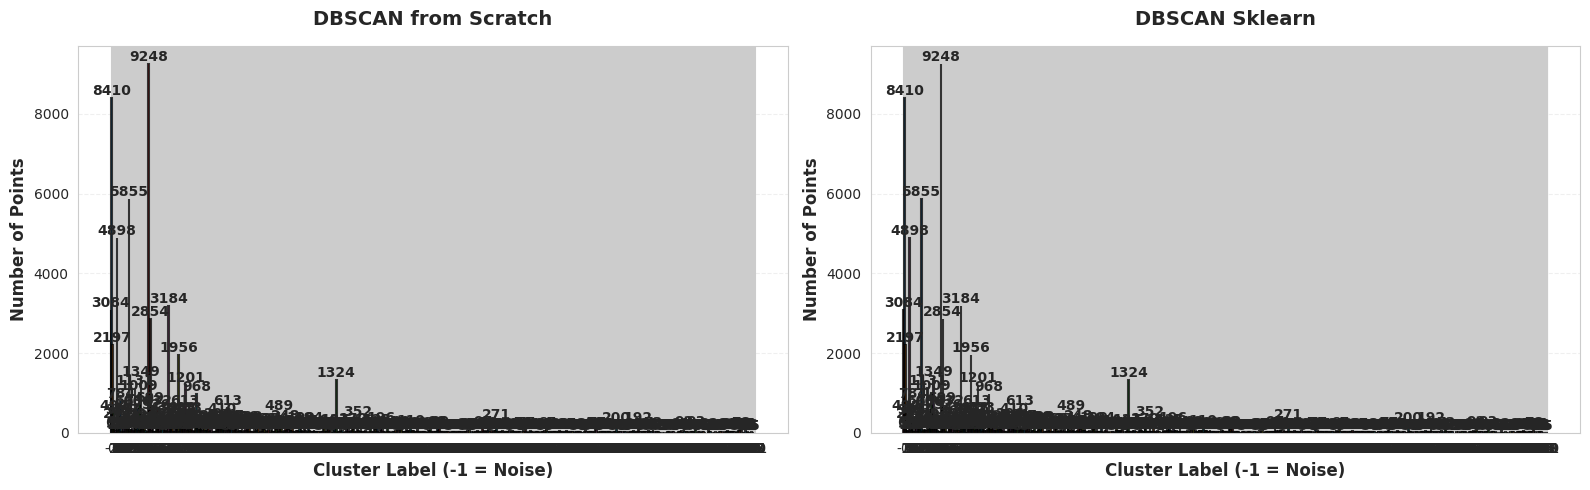


📊 Creating 2D PCA projections...


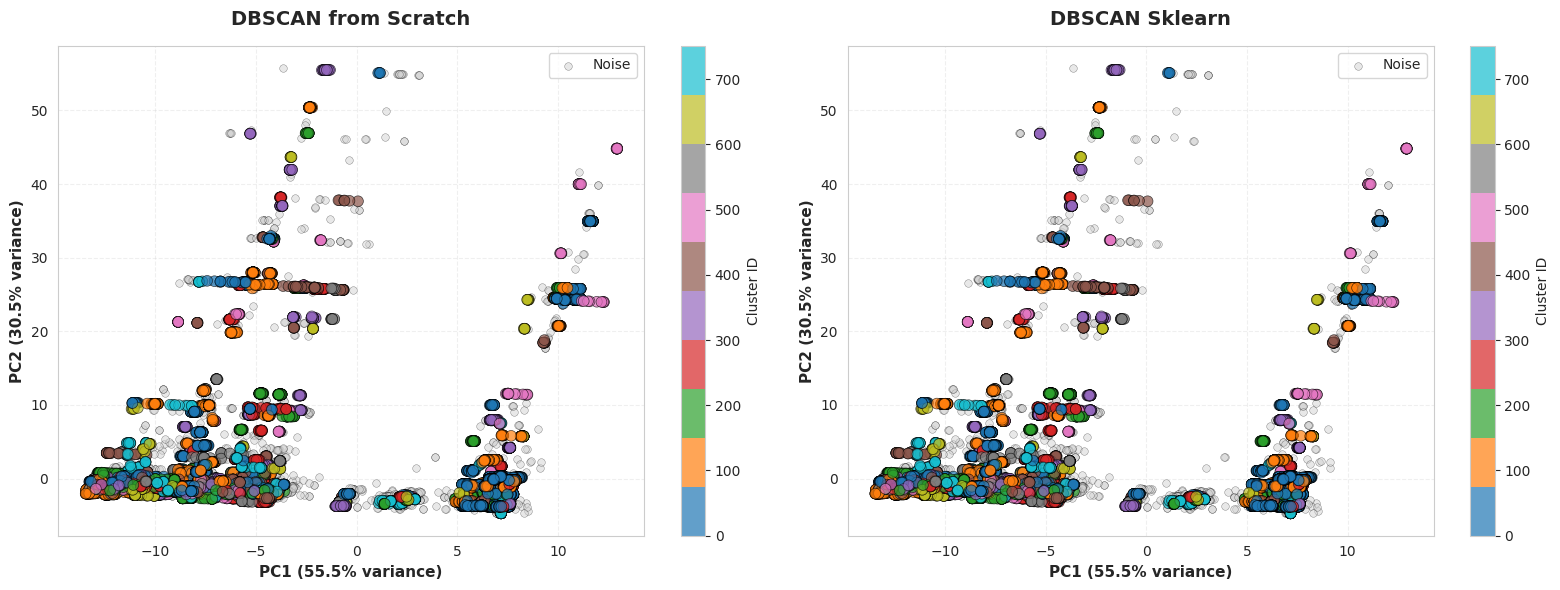

Streaming output truncated to the last 5000 lines.
      Size: 526 points
      Mean: [-0.633 -0.491 -1.05  -0.551  2.999 -0.966  1.247  0.065  0.701 -0.375
 -0.786 -0.364 -0.505  1.     0.071  4.    -0.527  0.612  1.676]
      Std:  [0.403 0.221 0.406 0.14  0.011 0.103 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.302 0.294]

   Cluster 53:
      Size: 632 points
      Mean: [ 0.626  1.591  1.453  1.709  0.     1.173 -1.502 -1.438 -1.878 -0.556
  1.325 -1.315  1.923  1.     0.243  1.42   1.951 -1.157 -2.703]
      Std:  [0.829 0.192 0.119 0.117 0.    0.148 0.018 0.013 0.004 0.004 0.005 0.005
 0.006 0.    0.014 0.001 0.014 0.627 0.475]

   Cluster 54:
      Size: 182 points
      Mean: [-1.291  0.215 -0.043 -0.428 19.    -0.5   -1.187  0.558 -0.451  5.279
  1.397  1.569 -0.327  2.    -2.646 38.9   -0.91   0.704  0.872]
      Std:  [0.097 0.09  0.134 0.118 0.    0.291 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.121 0.173]

   Cluster 55:
      S

In [ ]:
# VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 7: GENERATING VISUALIZATIONS")
print("=" * 80)

# 1. Cluster Size Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for ax, labels, title in zip(axes,
                              [labels_scratch, labels_sklearn],
                              ['DBSCAN from Scratch', 'DBSCAN Sklearn']):
    unique, counts = np.unique(labels, return_counts=True)
    colors = ['red' if x == -1 else plt.cm.tab10(x % 10) for x in unique]
    bars = ax.bar(range(len(unique)), counts, color=colors, edgecolor='black', alpha=0.75, linewidth=1.5)
    ax.set_xlabel('Cluster Label (-1 = Noise)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Points', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xticks(range(len(unique)))
    ax.set_xticklabels(unique)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. PCA Visualization
print("\n📊 Creating 2D PCA projections...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for ax, labels, title in zip(axes,
                              [labels_scratch, labels_sklearn],
                              ['DBSCAN from Scratch', 'DBSCAN Sklearn']):
    # Plot noise points first (so they're in background)
    noise_mask = labels == -1
    if np.any(noise_mask):
        ax.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
                  c='lightgray', s=30, alpha=0.5, label='Noise',
                  edgecolors='black', linewidth=0.3)

    # Plot clustered points
    cluster_mask = labels != -1
    if np.any(cluster_mask):
        scatter = ax.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                           c=labels[cluster_mask], cmap='tab10',
                           s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
        plt.colorbar(scatter, ax=ax, label='Cluster ID')

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)',
                 fontsize=11, fontweight='bold')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)',
                 fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# 3. Cluster Statistics
if n_clusters_sklearn > 0:
    print("\n📊 Cluster Statistics:")

    cluster_info = []
    for cluster_id in sorted(set(labels_sklearn)):
        if cluster_id == -1:
            continue
        mask = labels_sklearn == cluster_id
        cluster_data = X[mask]
        cluster_info.append({
            'Cluster': cluster_id,
            'Size': np.sum(mask),
            'Mean': cluster_data.mean(axis=0).round(3),
            'Std': cluster_data.std(axis=0).round(3)
        })

    for info in cluster_info:
        print(f"\n   Cluster {info['Cluster']}:")
        print(f"      Size: {info['Size']} points")
        print(f"      Mean: {info['Mean']}")
        print(f"      Std:  {info['Std']}")

In [ ]:
# SUMMARY AND PARAMETER TUNING GUIDE
# ============================================================================

print("\n" + "=" * 80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

print(f"""
✅ DBSCAN CLUSTERING COMPLETED!

📊 Results with current parameters (eps={eps:.4f}, min_samples={min_samples}):
   • Data points:      {len(X)}
   • Clusters found:   {n_clusters_sklearn}
   • Noise points:     {n_noise_sklearn} ({100*n_noise_sklearn/len(labels_sklearn):.1f}%)
   • Clustered points: {len(labels_sklearn) - n_noise_sklearn} ({100*(len(labels_sklearn)-n_noise_sklearn)/len(labels_sklearn):.1f}%)
   • Silhouette Score: {sil_sk:.4f if sil_sk else 'N/A'}

🔧 PARAMETER TUNING GUIDE:
""")

if n_noise_sklearn / len(labels_sklearn) > 0.3:
    print("   ⚠️  HIGH NOISE (>30%):")
    print(f"      → Try INCREASING eps (e.g., {eps*1.2:.4f} or {eps*1.5:.4f})")
    print(f"      → Or DECREASING min_samples (e.g., {max(2, min_samples-2)})")
elif n_noise_sklearn / len(labels_sklearn) < 0.05:
    print("   ⚠️  LOW NOISE (<5%):")
    print(f"      → Try DECREASING eps (e.g., {eps*0.8:.4f})")
    print(f"      → Or INCREASING min_samples (e.g., {min_samples+2})")
else:
    print("   ✅ Noise level looks reasonable!")

if n_clusters_sklearn < 2:
    print("\n   ⚠️  TOO FEW CLUSTERS:")
    print(f"      → Try DECREASING eps (e.g., {eps*0.7:.4f})")
    print(f"      → Or DECREASING min_samples (e.g., {max(2, min_samples-1)})")
elif n_clusters_sklearn > len(X) * 0.2:
    print("\n   ⚠️  TOO MANY CLUSTERS:")
    print(f"      → Try INCREASING eps (e.g., {eps*1.3:.4f})")
    print(f"      → Or INCREASING min_samples (e.g., {min_samples+2})")
else:
    print("\n   ✅ Number of clusters looks reasonable!")

print("""
💡 NEXT STEPS:
   1. If not satisfied, adjust eps and min_samples above and re-run
   2. Examine the PCA plots to visually assess cluster quality
   3. Use the k-distance graphs to find better parameter combinations
   4. Compare metrics between different parameter settings
   5. Both implementations (scratch and sklearn) should give similar results

📝 To adjust parameters:
   • Go to "STEP 2: SET YOUR DBSCAN PARAMETERS" section
   • Modify the 'eps' and 'min_samples' values
   • Re-run from that cell onwards
""")

print("=" * 80)